In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from violmulti.data.dataset_loader import DatasetLoader
from violmulti.experiments.experiment import load_experiment
from violmulti.utils.violation_iti import *
from violmulti.visualizations.model_visualizer import *
from violmulti.models.linear_regression import *

sns.set_context("talk")

%load_ext autoreload
%autoreload 2

DATA_PATH = "/Users/jessbreda/Desktop/github/violations-multinomial/data"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Behavior

## 1.1 Violation ITI

In [74]:
trained_df = DatasetLoader(data_type="new_trained", data_path=DATA_PATH).load_data()

DataLoader: Loading data for animal ids:  ['W051', 'W060', 'W065', 'W066', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W088', 'W089', 'W094']


In [8]:
iti = ViolationITI()

iti_df = iti.compute_and_add_viol_iti_column(trained_df)

iti_df.head()

,animal_id,session_date,session_file_counter,rig_id,training_stage,s_a,s_b,hit,violation,trial_not_started,...,antibias_beta,antibias_right_prob,using_psychometric_pairs,choice,session,session_relative_to_old,n_prev_trial_not_started,trial,animal_id_session,violation_iti
0,W051,2014-07-17,327,19,4,60.0,68.0,NaN,1,False,...,3,0.5,NaN,2,326,326.0,0.0,1,W051_s326,NaN
1,W051,2014-07-17,327,19,4,60.0,68.0,NaN,1,False,...,3,0.5,NaN,2,326,326.0,0.0,2,W051_s326,0.0
2,W051,2014-07-17,327,19,4,76.0,68.0,NaN,1,False,...,3,0.5,NaN,2,326,326.0,0.0,3,W051_s326,0.0
3,W051,2014-07-17,327,19,4,68.0,76.0,1.0,0,False,...,3,0.5,NaN,0,326,326.0,0.0,4,W051_s326,NaN
4,W051,2014-07-17,327,19,4,84.0,76.0,1.0,0,False,...,3,0.5,NaN,1,326,326.0,0.0,5,W051_s326,NaN


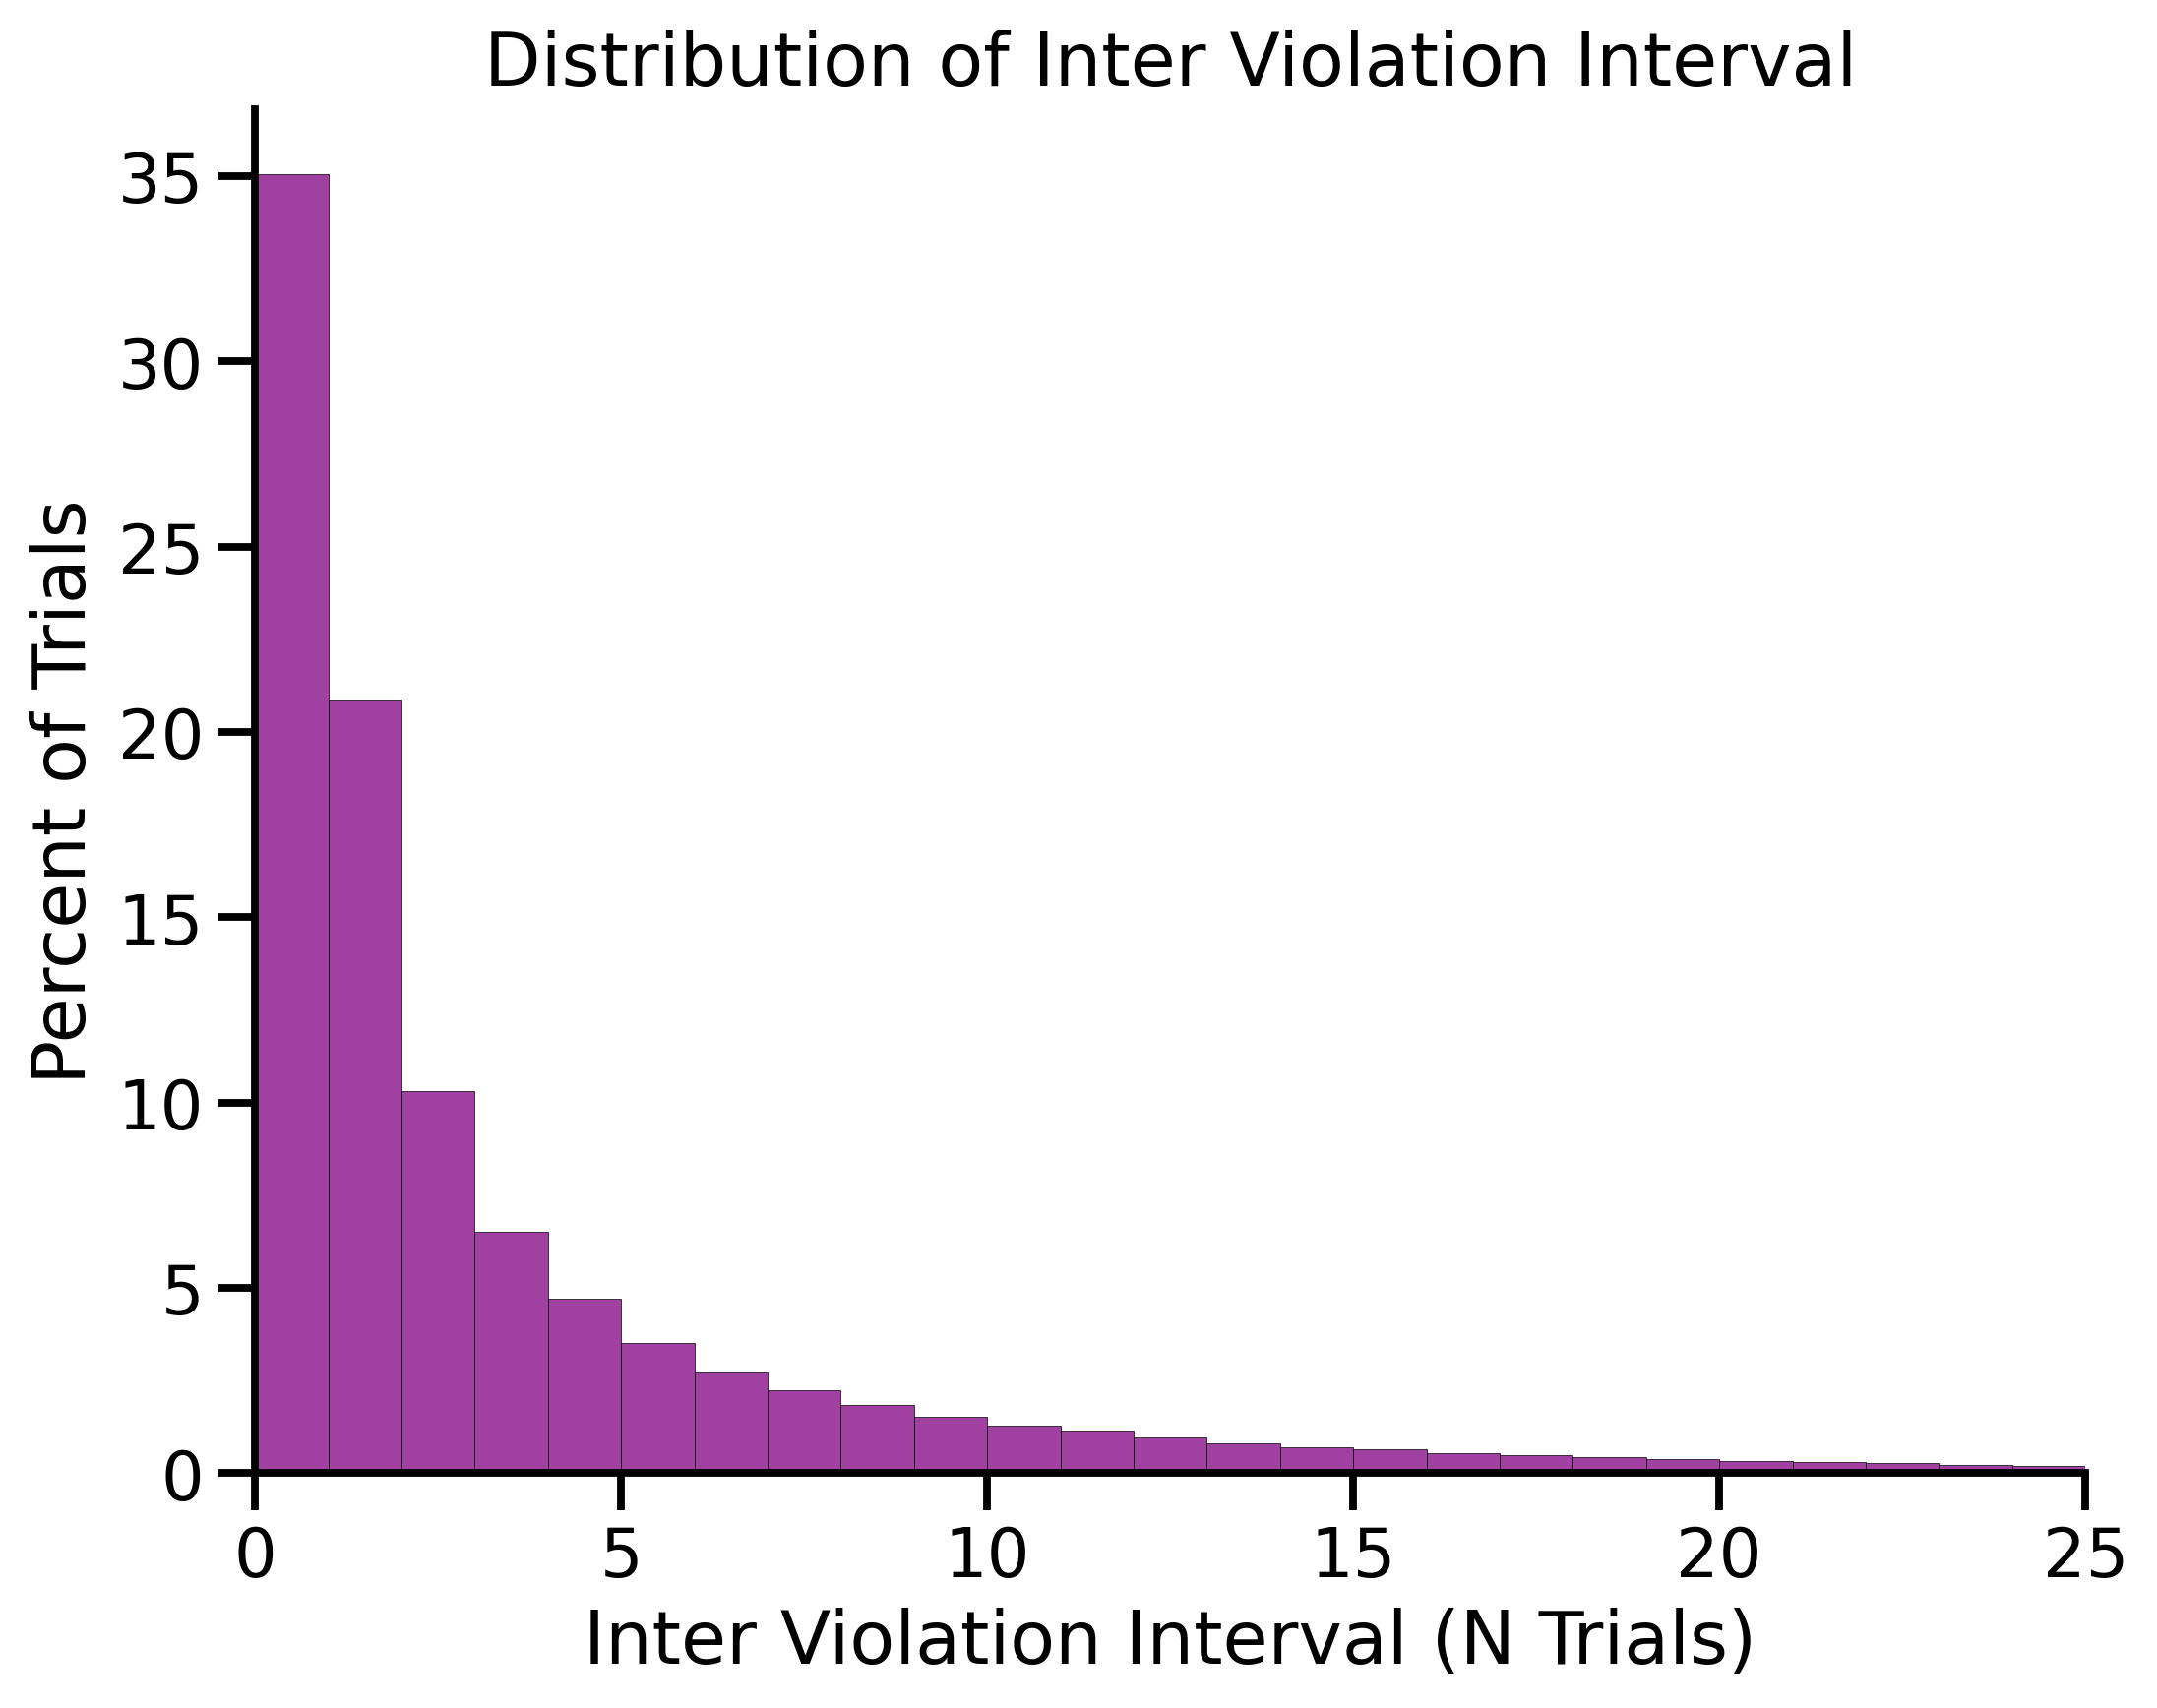

In [10]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

sns.histplot(
    data=iti_df,
    x="violation_iti",
    stat="percent",
    color="purple",
    ax=ax,
    binwidth=1,
)

ax.set(
    xlim=(0, 25),
    xlabel="Inter Violation Interval (N Trials)",
    ylabel="Percent of Trials",
    title="Distribution of Inter Violation Interval",
)


sns.despine()

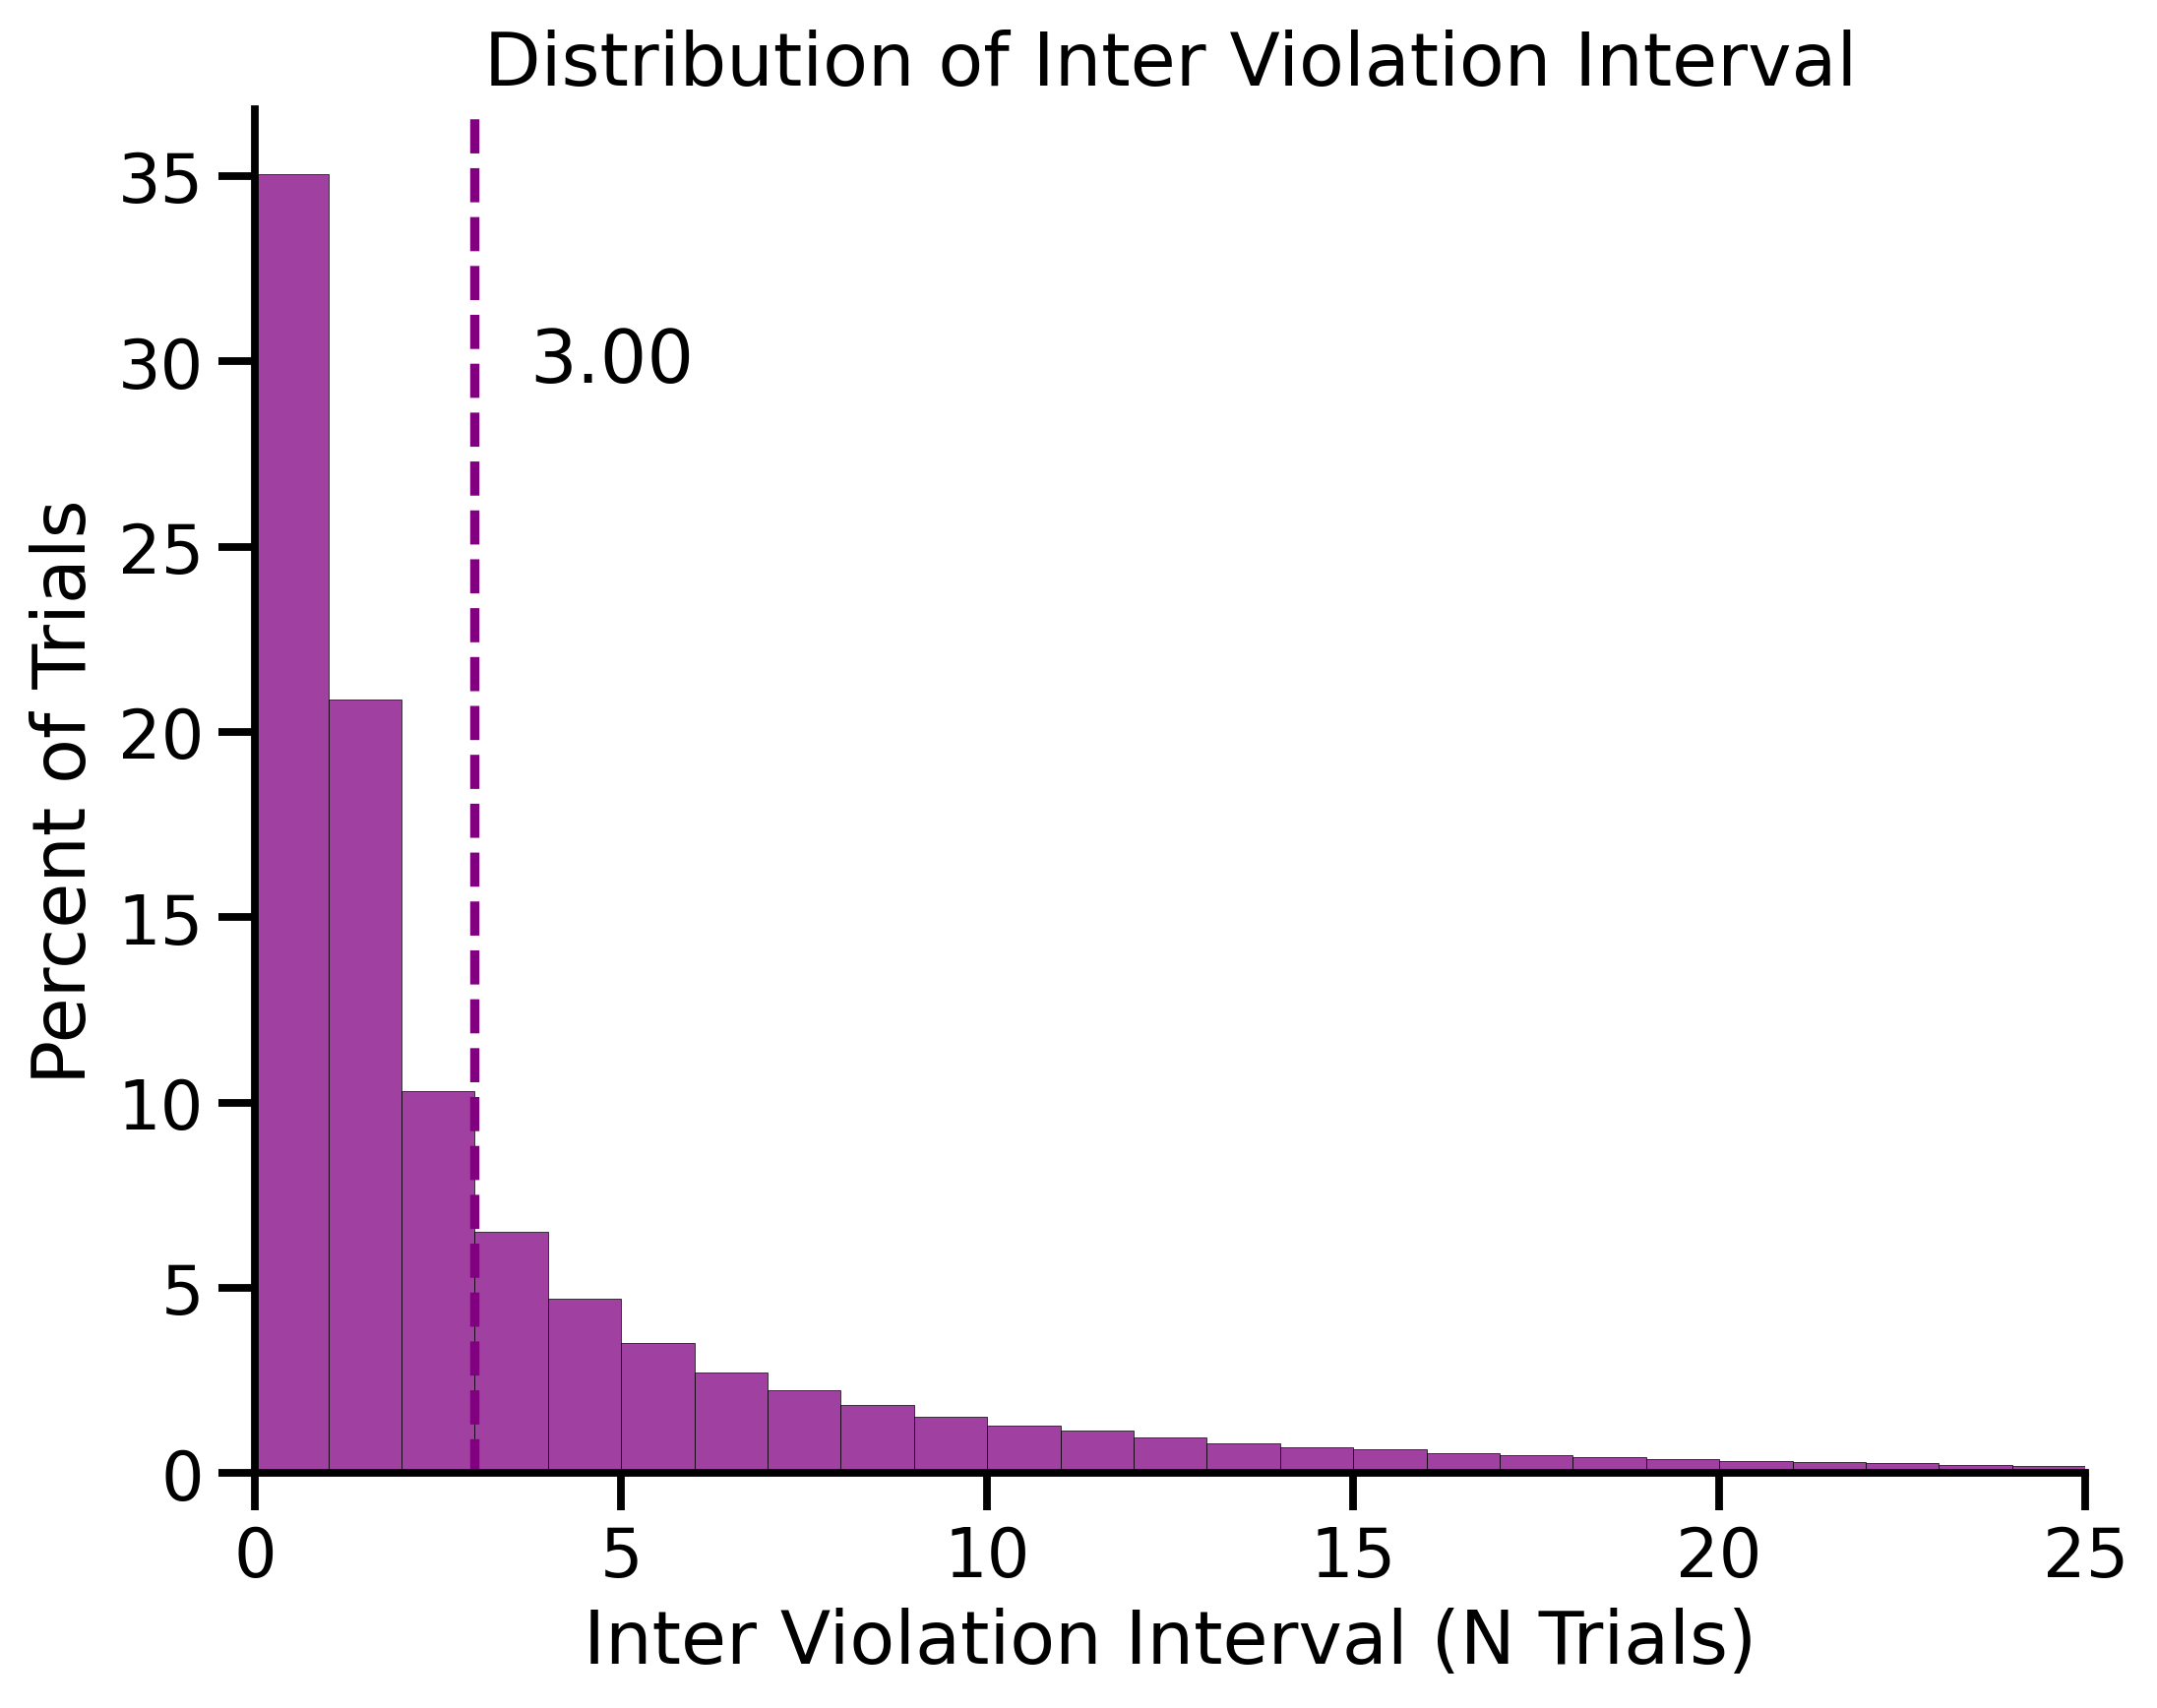

In [19]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

sns.histplot(
    data=iti_df,
    x="violation_iti",
    stat="percent",
    color="purple",
    ax=ax,
    binwidth=1,
)

ax.set(
    xlim=(0, 25),
    xlabel="Inter Violation Interval (N Trials)",
    ylabel="Percent of Trials",
    title="Distribution of Inter Violation Interval",
)
session_animal_avg_viol_iti = (
    iti_df.groupby(["animal_id", "session"])
    .violation_iti.median()
    .reset_index()
    .groupby("animal_id")
    .violation_iti.median()
    .reset_index()
    .violation_iti.median()
)
ax.annotate(
    f"{session_animal_avg_viol_iti:.2f}",
    xy=(0.15, 0.8),
    xycoords="axes fraction",
    ha="left",
)
ax.axvline(session_animal_avg_viol_iti, color="purple", linestyle="--", label="Median")

sns.despine()

## 1.2 Post Violation Hit Rate

In [88]:
fname = "/Users/jessbreda/Desktop/github/violations-multinomial/data/processed/from_eda/01_post_viol_hit_rates.csv"

post_viol_hit_rates = pd.read_csv(fname)
limits = (0.66, 1)
xlabel = "Hit Rate Post Non-Violaton"
ylabel = "Hit Rate Post Violation"

Text(0, 0.5, 'Hit Rate Post Violation')

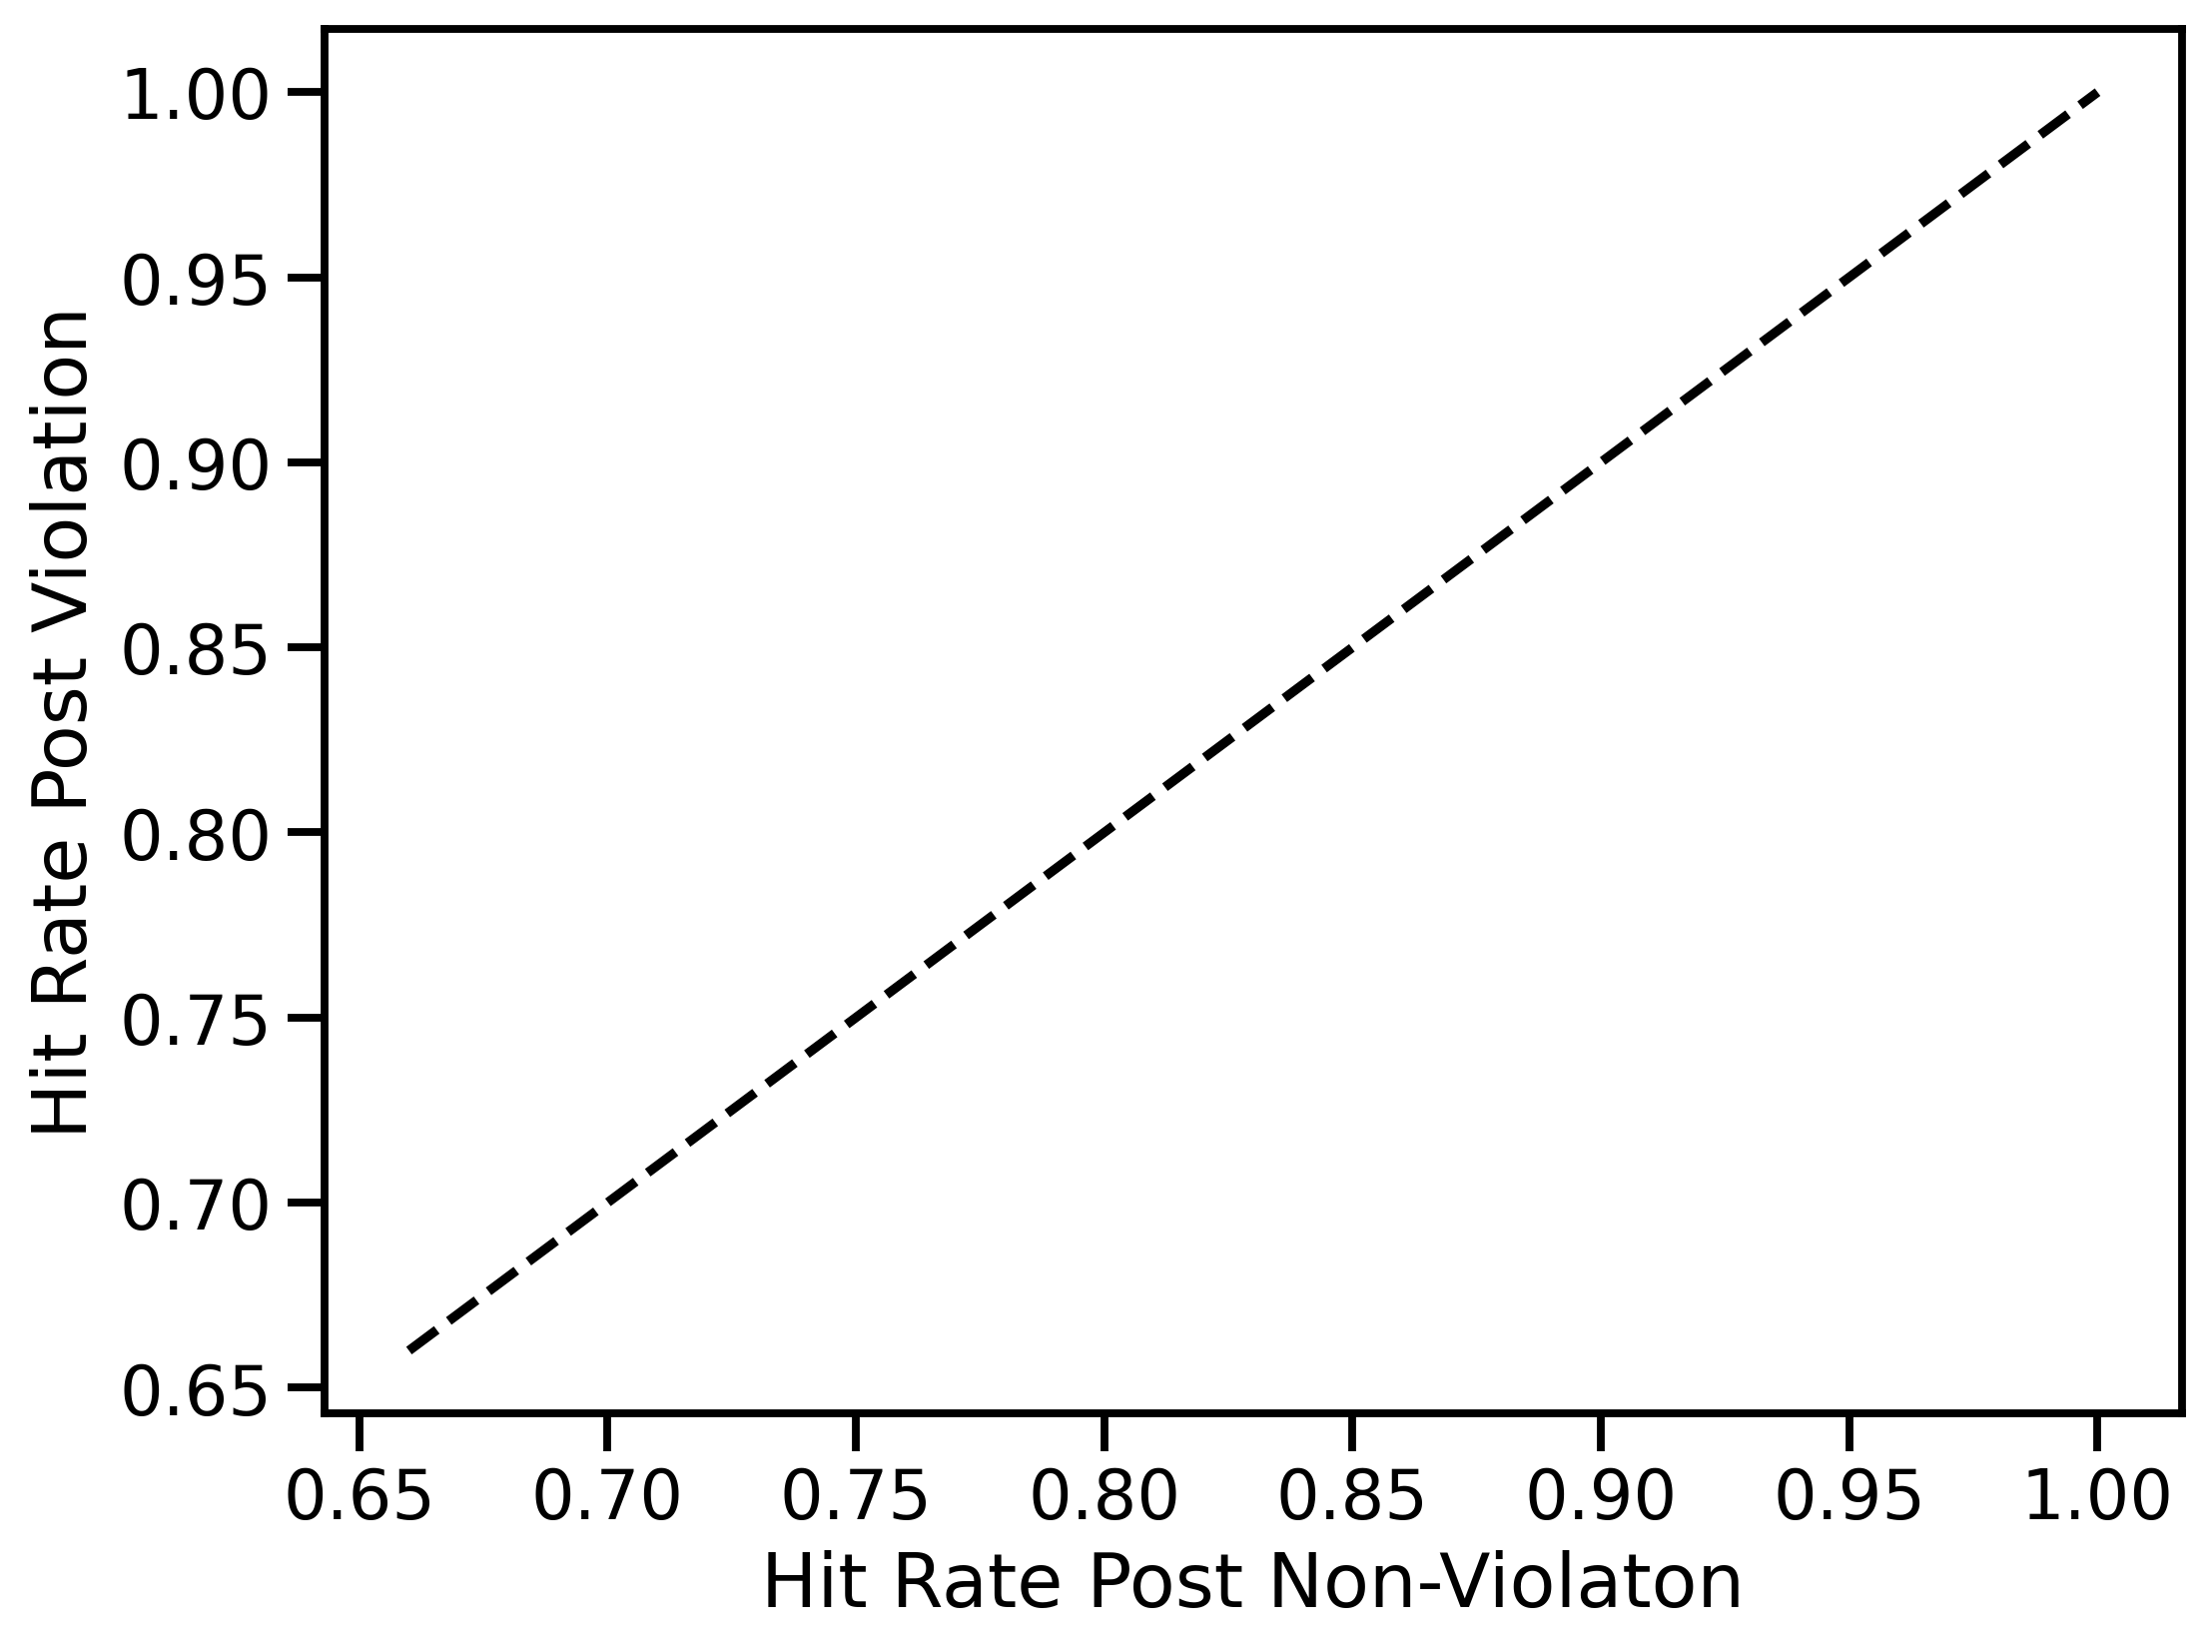

In [89]:
# Scatter plot
plt.figure(figsize=(8, 6), dpi=300)

plt.plot(limits, limits, "k--", label="Unity Line")

plt.xlabel(xlabel)
plt.ylabel(ylabel)

Text(0, 0.5, 'Hit Rate Post Violation')

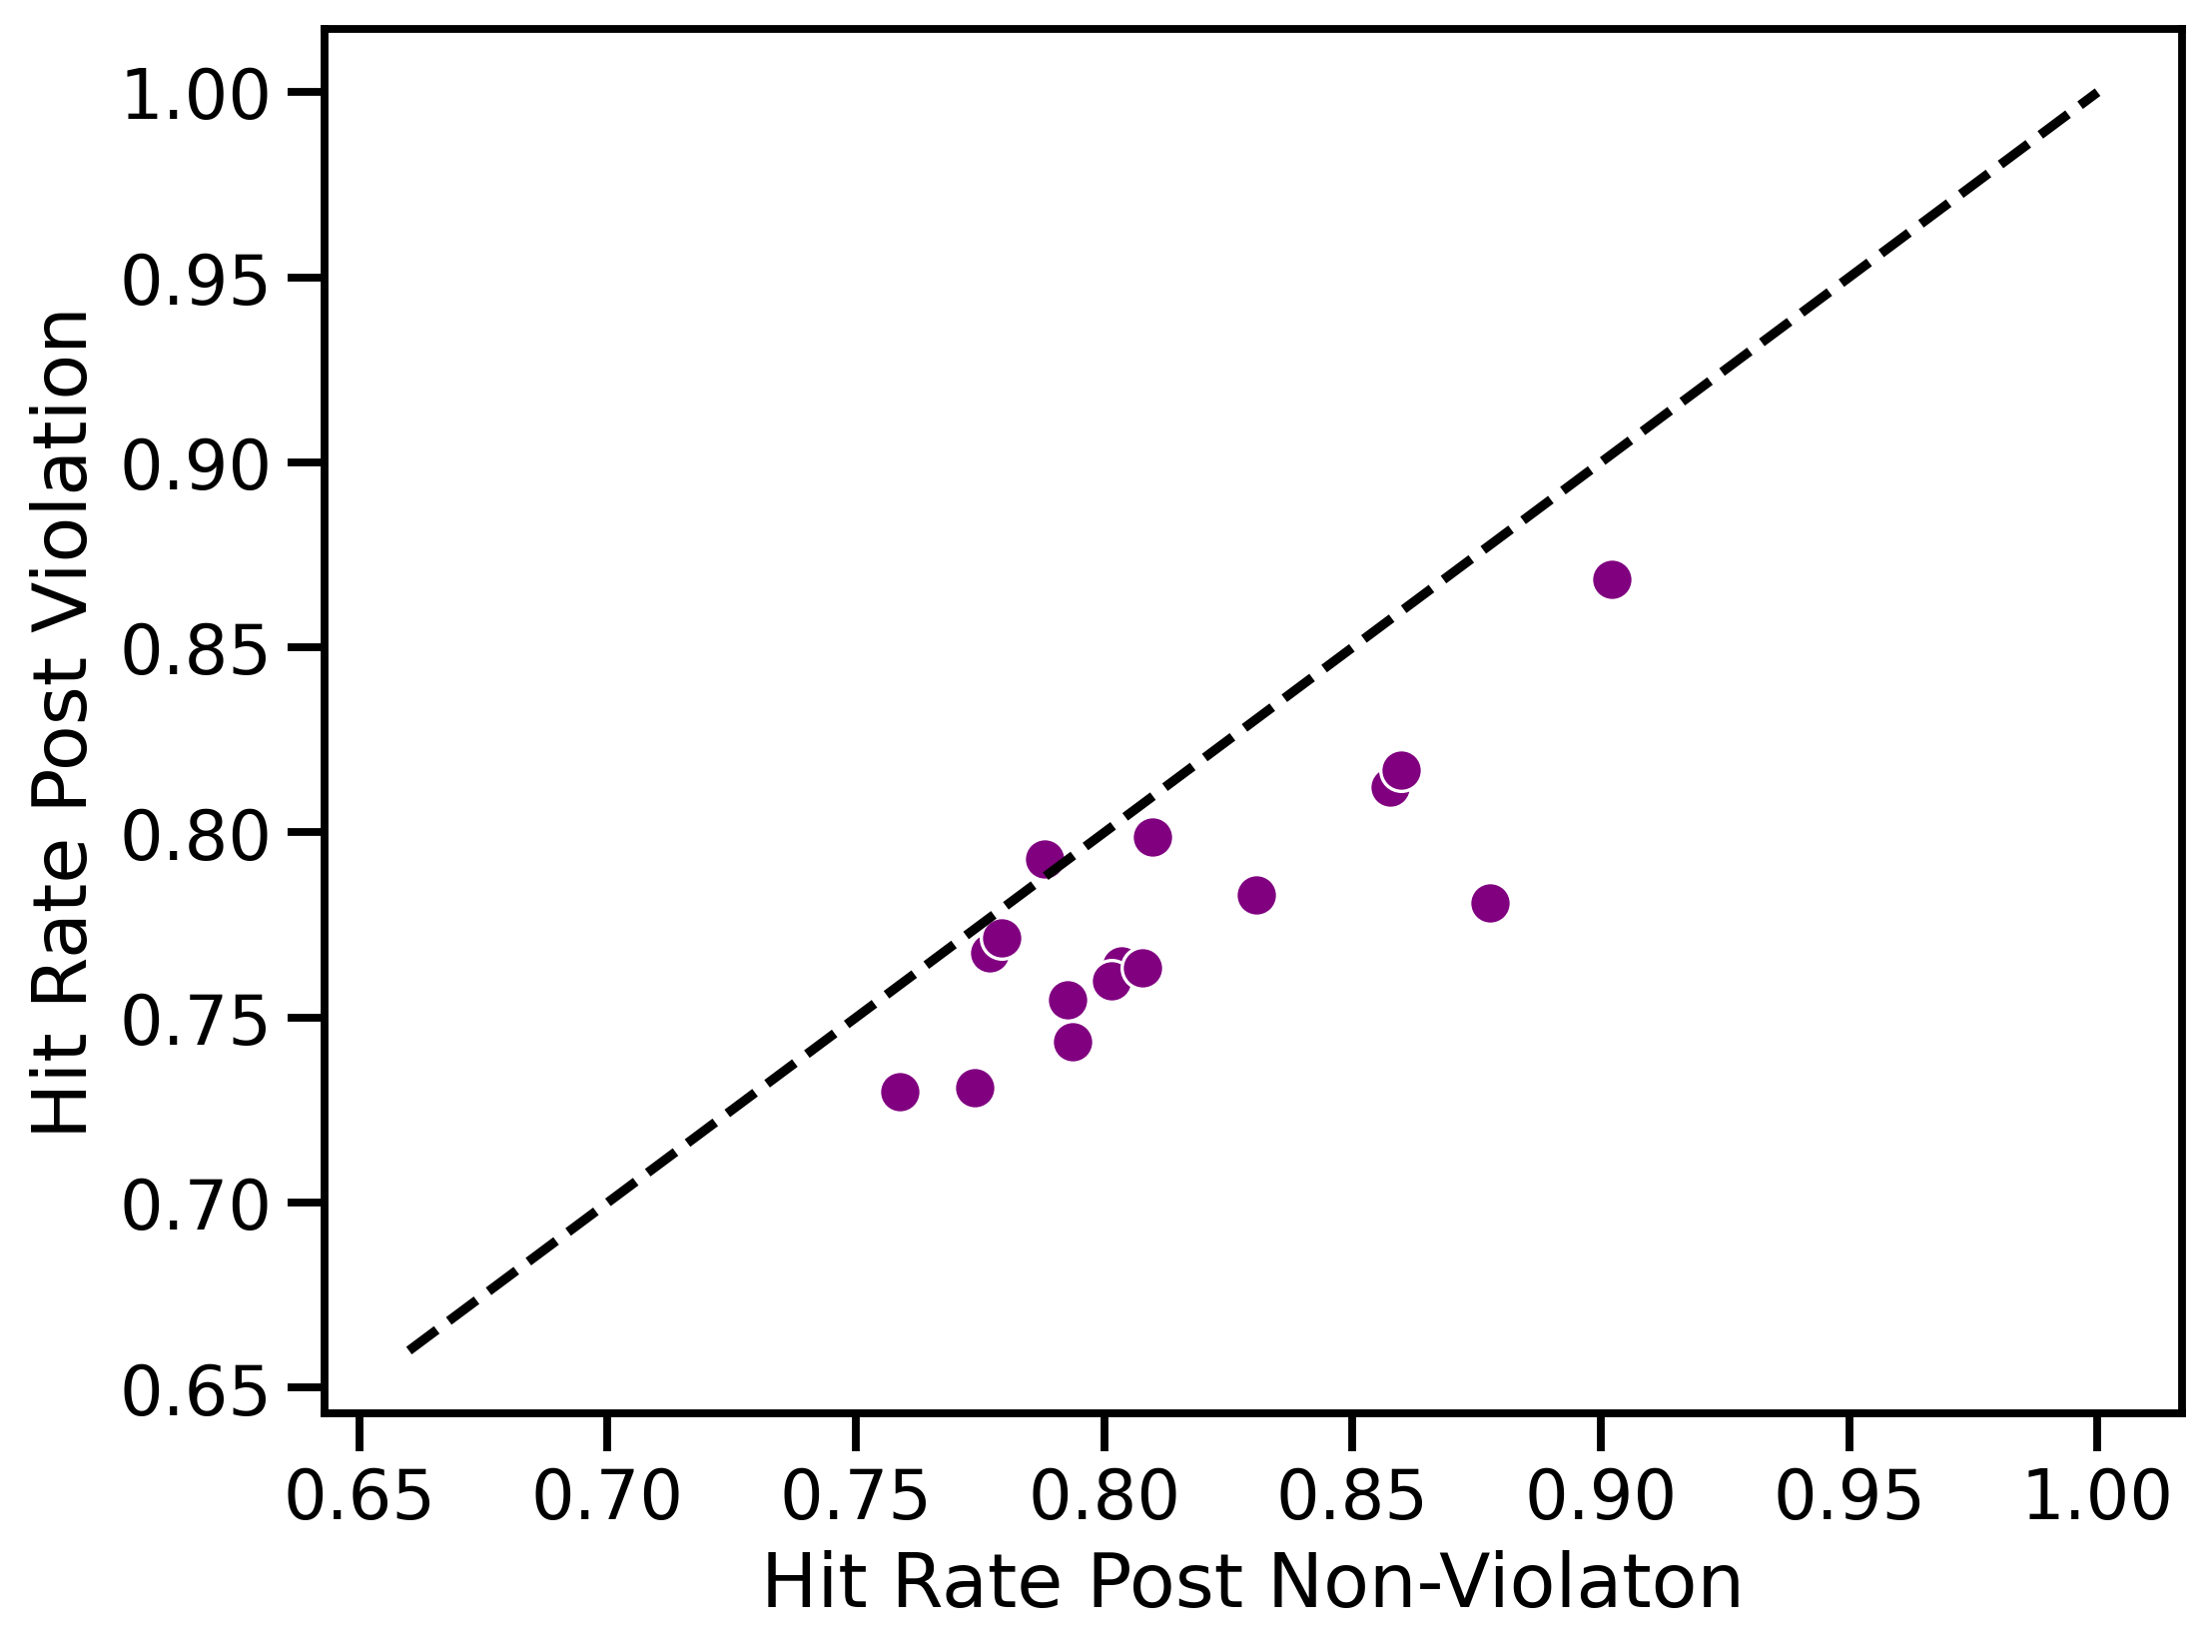

In [92]:
plt.figure(figsize=(8, 6), dpi=300)

sns.scatterplot(
    data=post_viol_hit_rates,
    x="hit_rate_no_prev_viol",
    y="hit_rate_with_prev_viol",
    s=100,
    color="purple",
)
plt.plot(limits, limits, "k--", label="Unity Line")

plt.xlabel(xlabel)
plt.ylabel(ylabel)

## 1.3 Violation Rate & Hit Rate Correlation 

In [128]:
trained_hit_viol_rates = pd.read_csv(
    "/Users/jessbreda/Desktop/github/violations-multinomial/data/processed/from_eda/01_trained_session_avg_hit_viol_rates.csv"
)

x = "trained_violation"
y = "trained_hit"
results = univariate_linear_regression(trained_hit_viol_rates, x, y, print_results=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     3.701
Date:                Wed, 04 Sep 2024   Prob (F-statistic):             0.0749
Time:                        18:23:27   Log-Likelihood:                 31.054
No. Observations:                  16   AIC:                            -58.11
Df Residuals:                      14   BIC:                            -56.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8663      0.031     27.732      0.0

/Users/jessbreda/anaconda3/envs/viol-multi/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


<Axes: title={'center': 'Hit Rate ~ Violation Rate'}, xlabel='Session Avg. Violation Rate', ylabel='Session Avg. Hit Rate'>

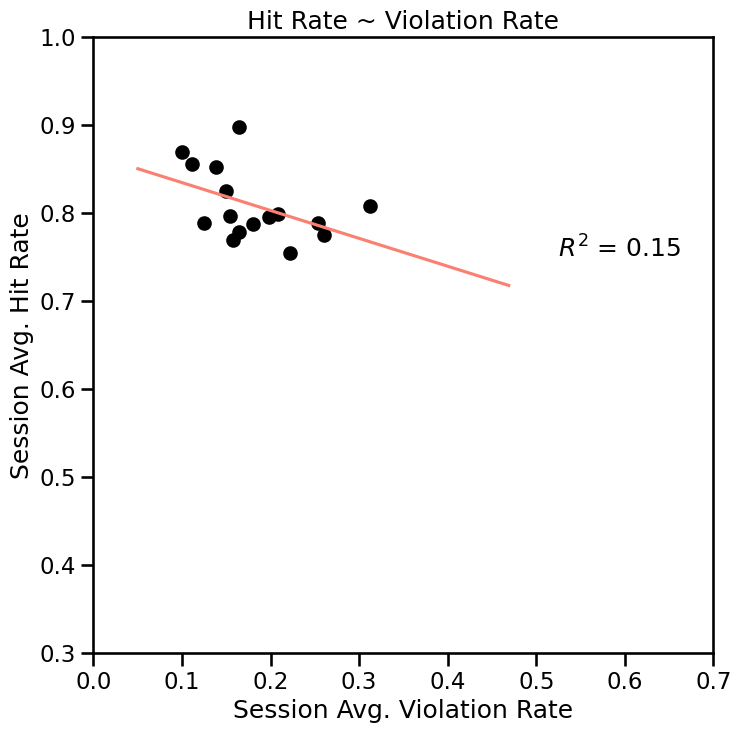

In [129]:
plot_univariate_linear_regression(
    results,
    xlabel="Session Avg. Violation Rate",
    ylabel="Session Avg. Hit Rate",
    title=f"Hit Rate ~ Violation Rate",
    ylim=(0.3, 1.0),
    xlim=(0, 0.7),
)

# 2. Weight Plots

## 2.1 Prev Violation Regressor

In [69]:
save_name = "2024_08_31_fit_prev_violation_tcm.pkl"
experiment = load_experiment(save_name)
mv = ModelVisualizer(experiment)

order = ["s_a", "s_b", "prev_violation", "prev_stim_avg", "prev_correct", "prev_choice"]
xlabels = [
    "Stim A",
    "Stim B",
    "Prev\nViolation",
    "Prev\nStim Avg",
    "Prev\nCorrect",
    "Prev\nChoice",
]
title = "Multinomial Model Weights"
ylim = (-2, 2)
ylabel = "Weight"

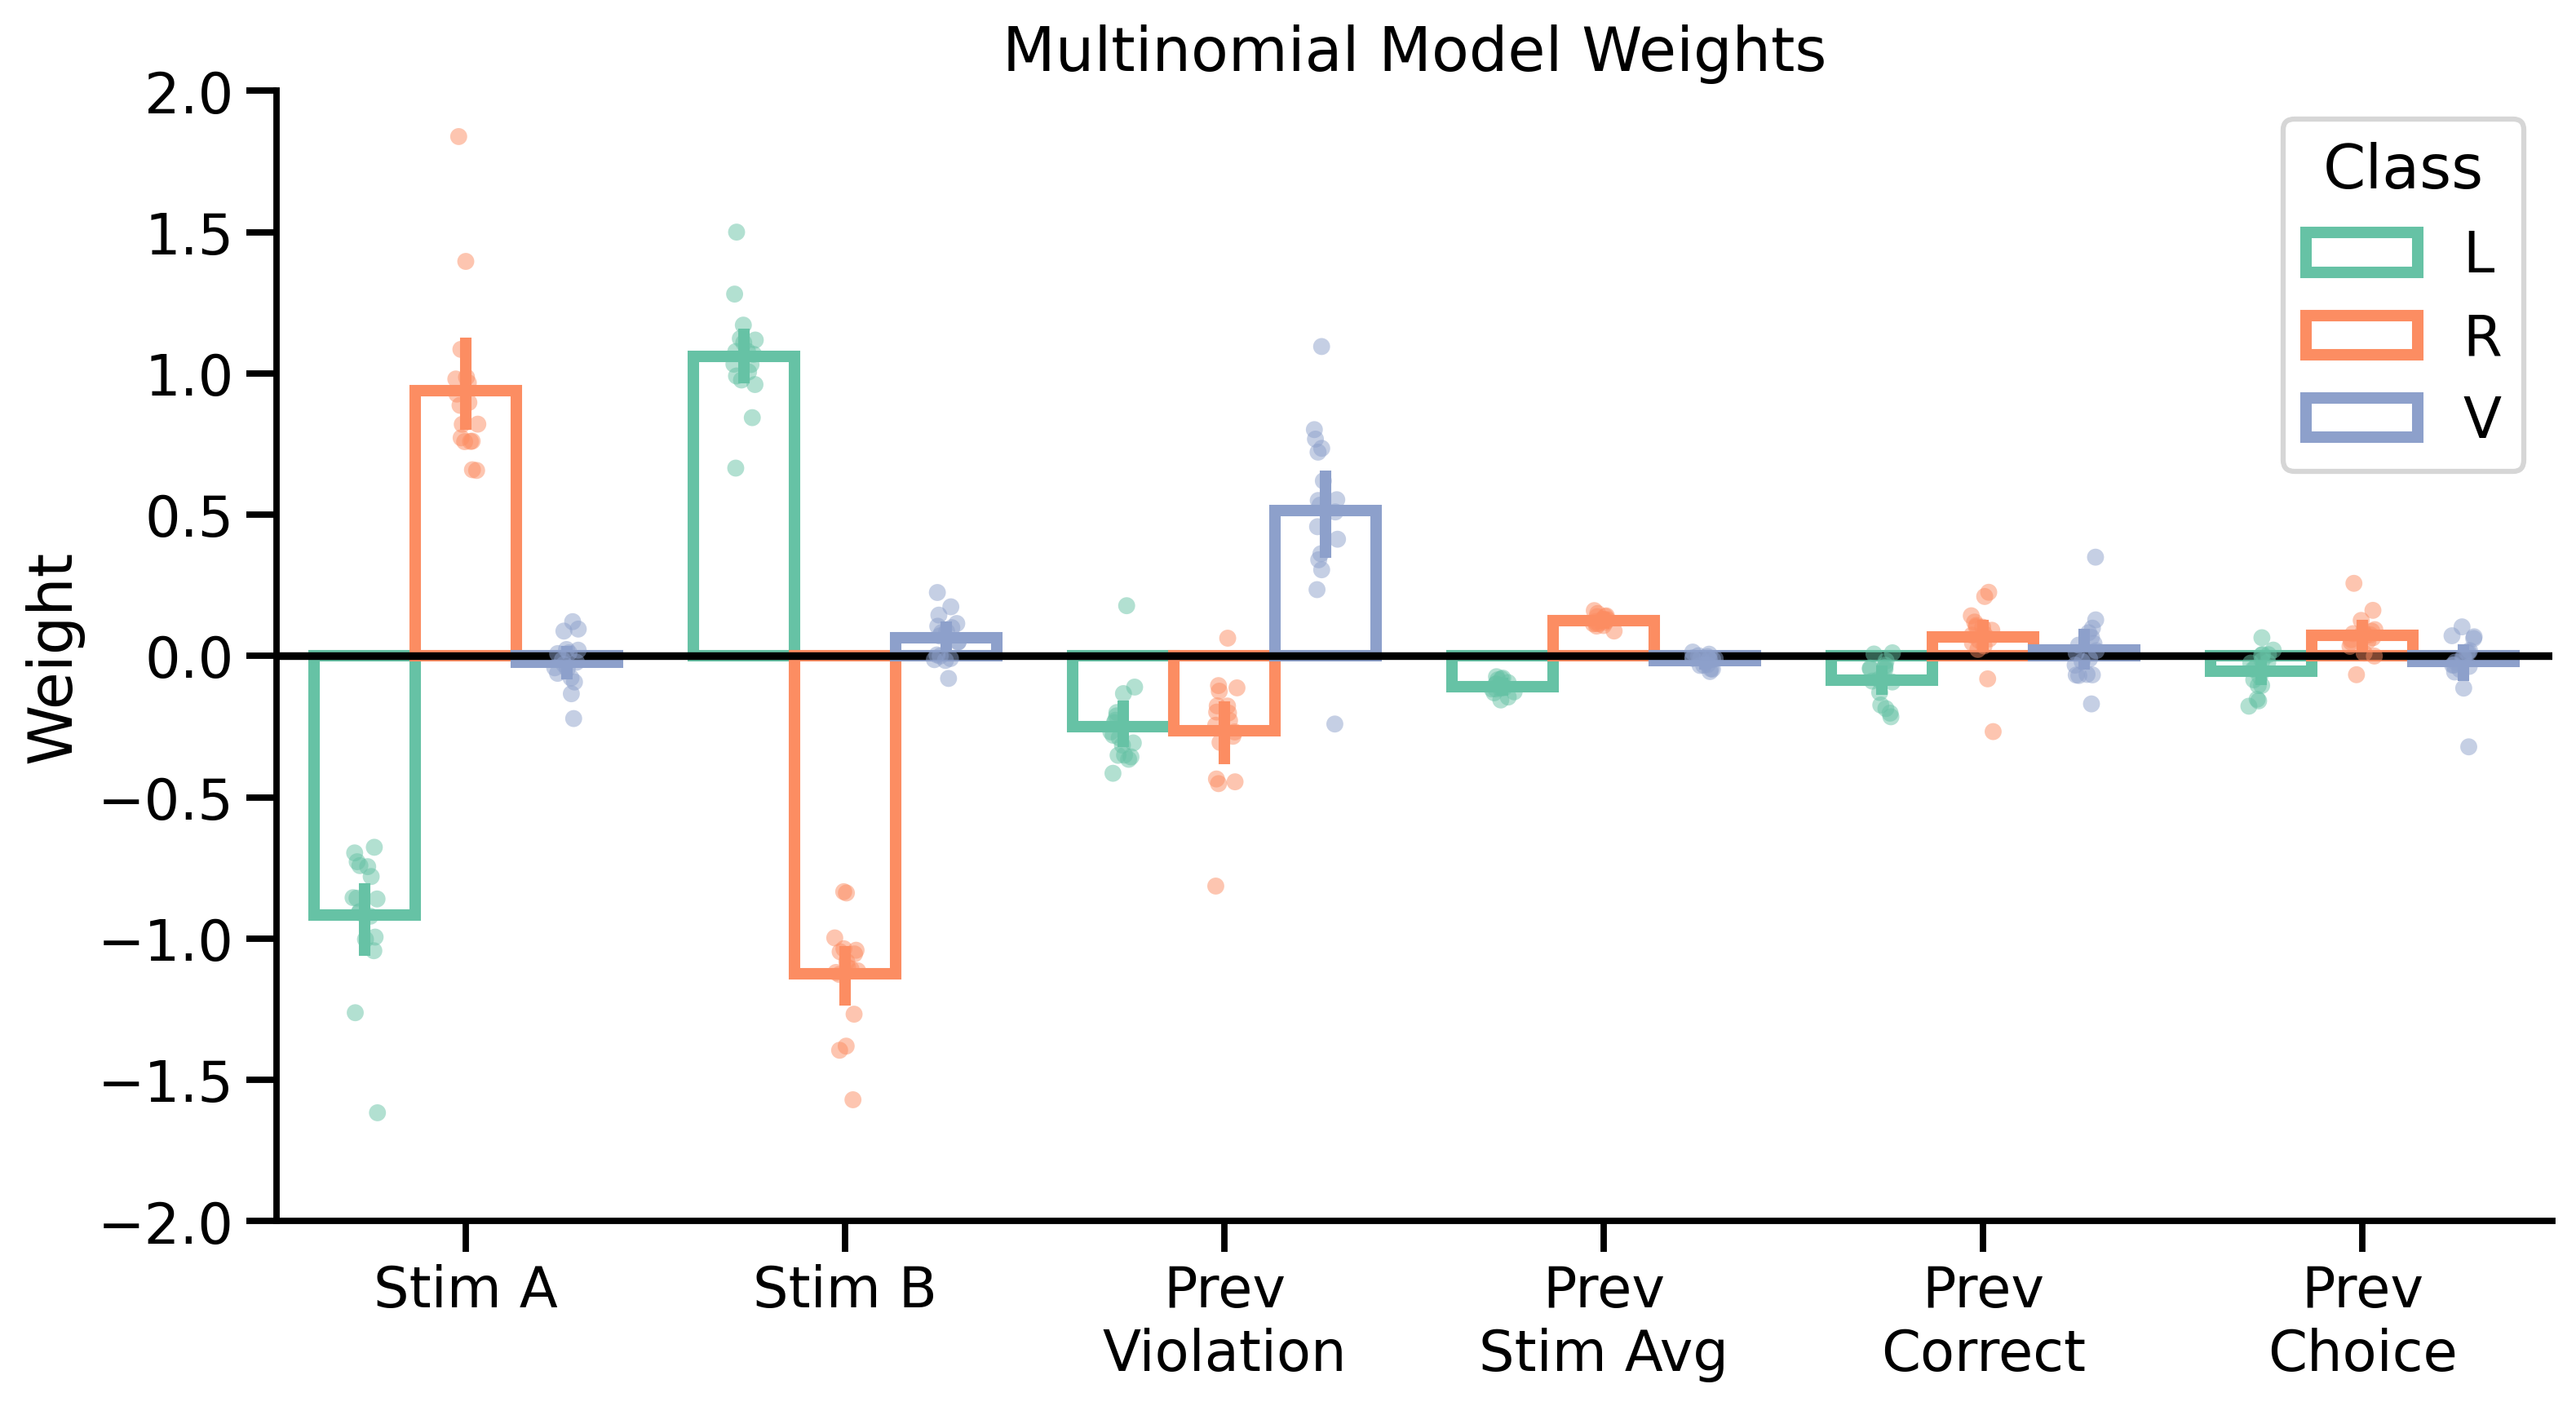

In [72]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)
mv.plot_weights_summary(
    plot_individuals=True,
    palette="Set2",
    order=order,
    ax=ax,
)

ax.legend(title="Class")
_ = ax.set(title=title, ylabel=ylabel, xlabel="", ylim=ylim)

_ = ax.set_xticklabels(
    xlabels,
    rotation=0,
    ha="center",
)

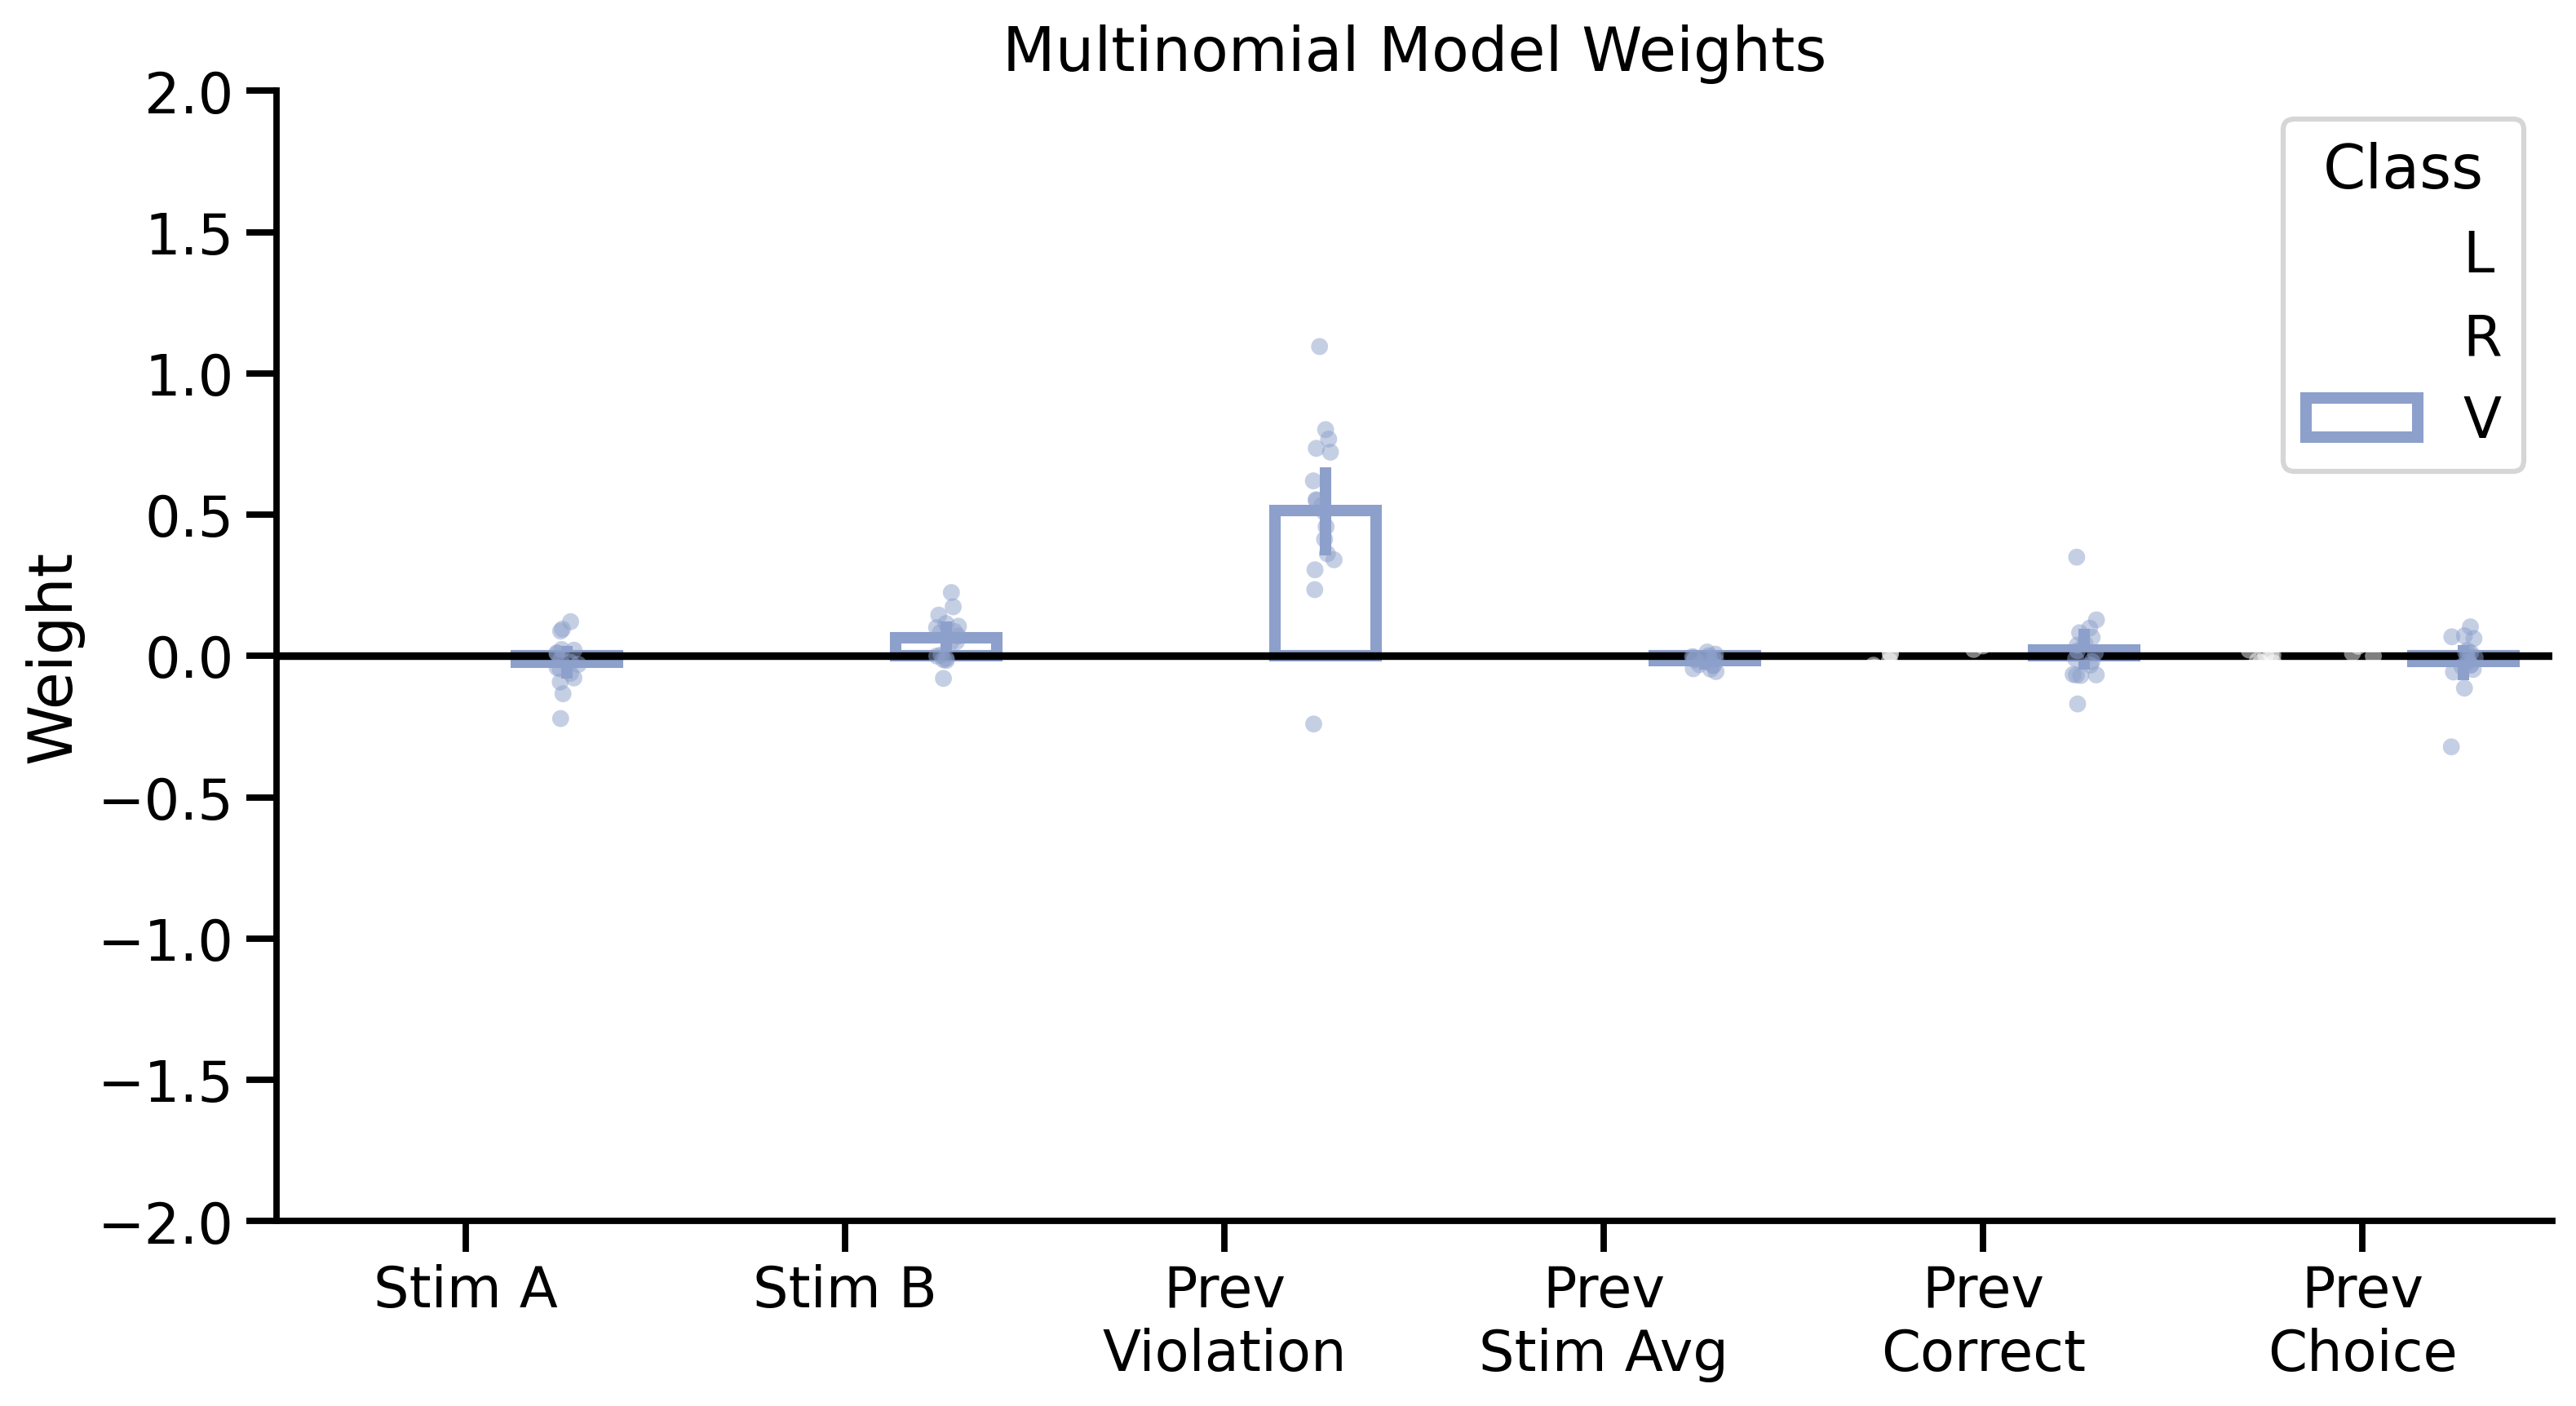

In [71]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

# set up palette to make L & R white
set2 = sns.color_palette("Set2", 3)
violation_only_pal = ["white", "white", set2[2]]

mv.plot_weights_summary(
    plot_individuals=True,
    palette=violation_only_pal,
    order=order,
    ax=ax,
)

ax.legend(title="Class")
_ = ax.set(title=title, ylabel=ylabel, xlabel="", ylim=ylim)
_ = ax.set_xticklabels(
    xlabels,
    rotation=0,
    ha="center",
)

### 2.2 Filt Prev Violation



In [118]:
save_name = "2024_08_31_fit_prev_violation_stim_intrxs_tcm.pkl"
experiment2 = load_experiment(save_name)
mv2 = ModelVisualizer(experiment2)

order = [
    "s_a",
    "s_b",
    "prev_violation_filt",
    "prev_stim_avg",
    "prev_correct",
    "prev_choice",
]
xlabels = [
    "Stim A",
    "Stim B",
    "Prev\nViolation\nFilt",
    "Prev\nStim Avg",
    "Prev\nCorrect",
    "Prev\nChoice",
]
title = "Multinomial Model Weights"
ylim = (-2, 2)
ylabel = "Weight"

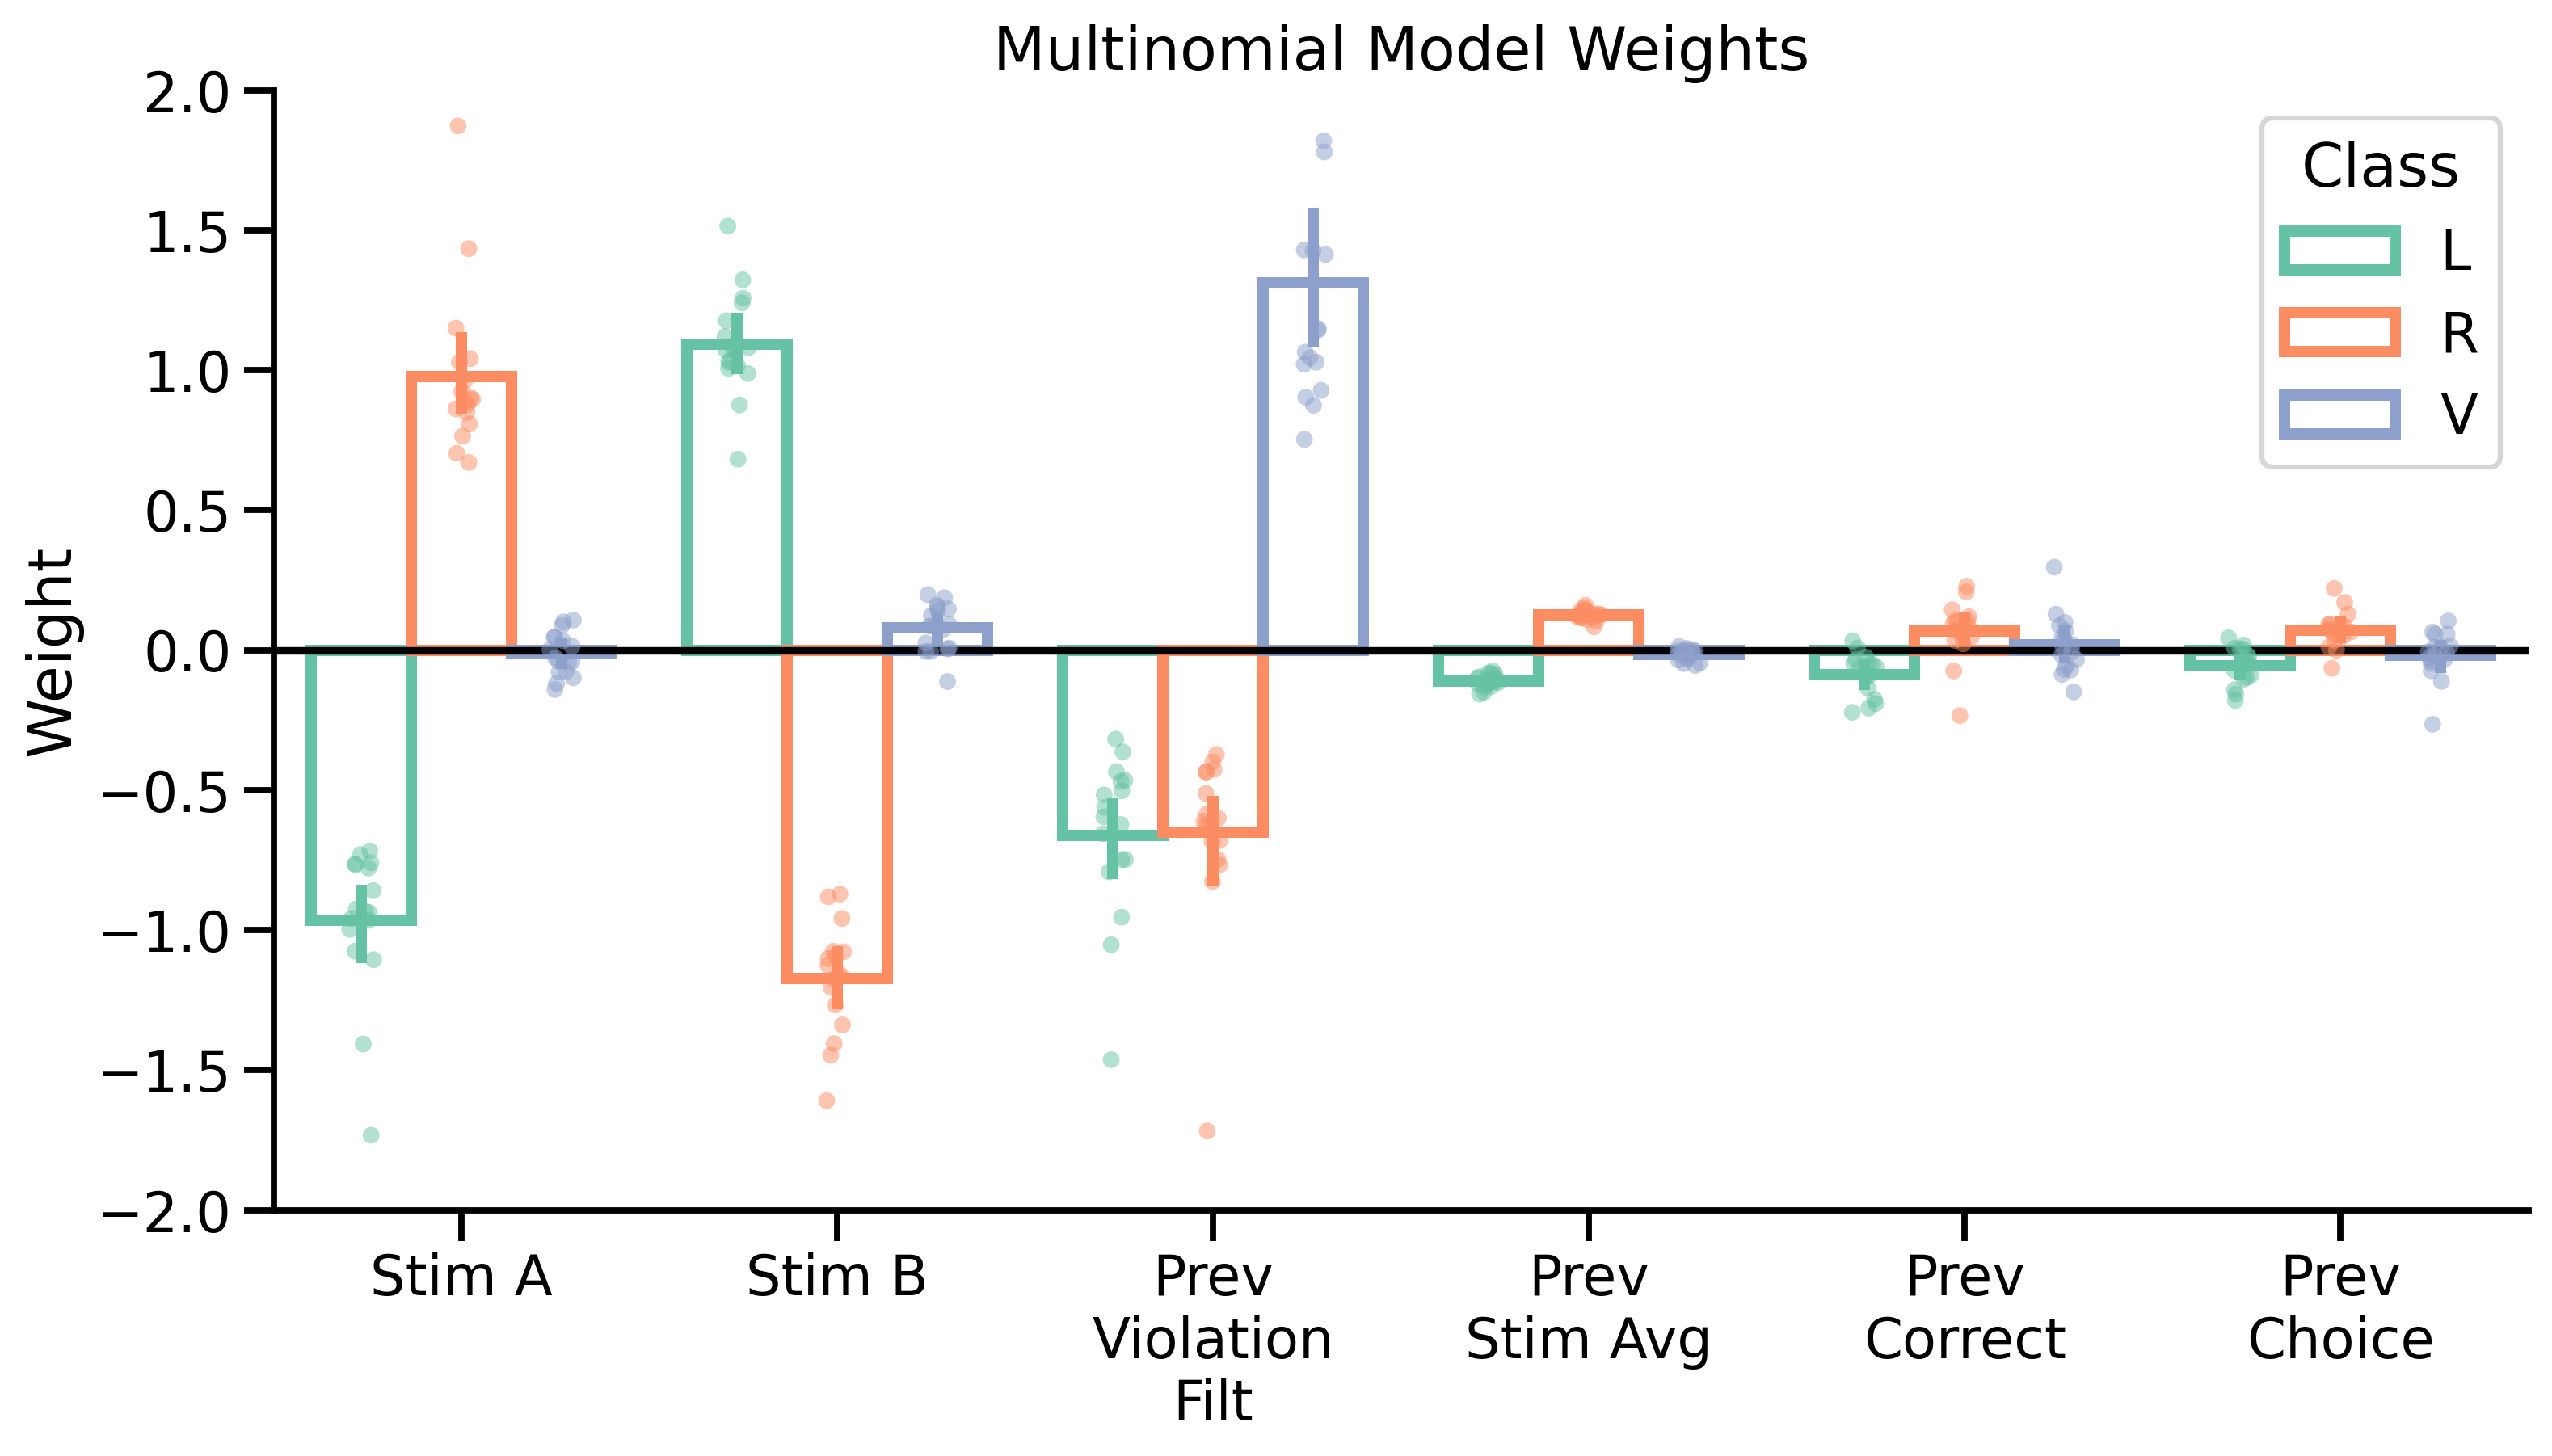

In [119]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)
mv2.plot_weights_summary(
    plot_individuals=True,
    palette="Set2",
    order=order,
    ax=ax,
)

ax.legend(bbox_to_anchor=(1, 1), title="Class")
_ = ax.set(title=title, ylabel=ylabel, xlabel="", ylim=ylim)
_ = ax.set_xticklabels(
    xlabels,
    rotation=0,
    ha="center",
)

### 2.3 Interaction Terms

In [122]:
save_name = "2024_08_31_fit_prev_violation_stim_intrxs_tcm.pkl"
experiment2 = load_experiment(save_name)
mv2 = ModelVisualizer(experiment2)
order = [
    "s_a",
    "s_a_x_prev_viol",
    "s_b",
    "s_b_x_prev_viol",
    "prev_violation_filt",
]
xlabels = [
    "Stim A",
    "Stim A \nx\n Prev Viol",
    "Stim B",
    "Stim B \nx\n Prev Viol",
    "Prev\nViolation\nFilt",
]
title = "Multinomial Model Weights"
ylim = (-2, 2)
ylabel = "Weight"

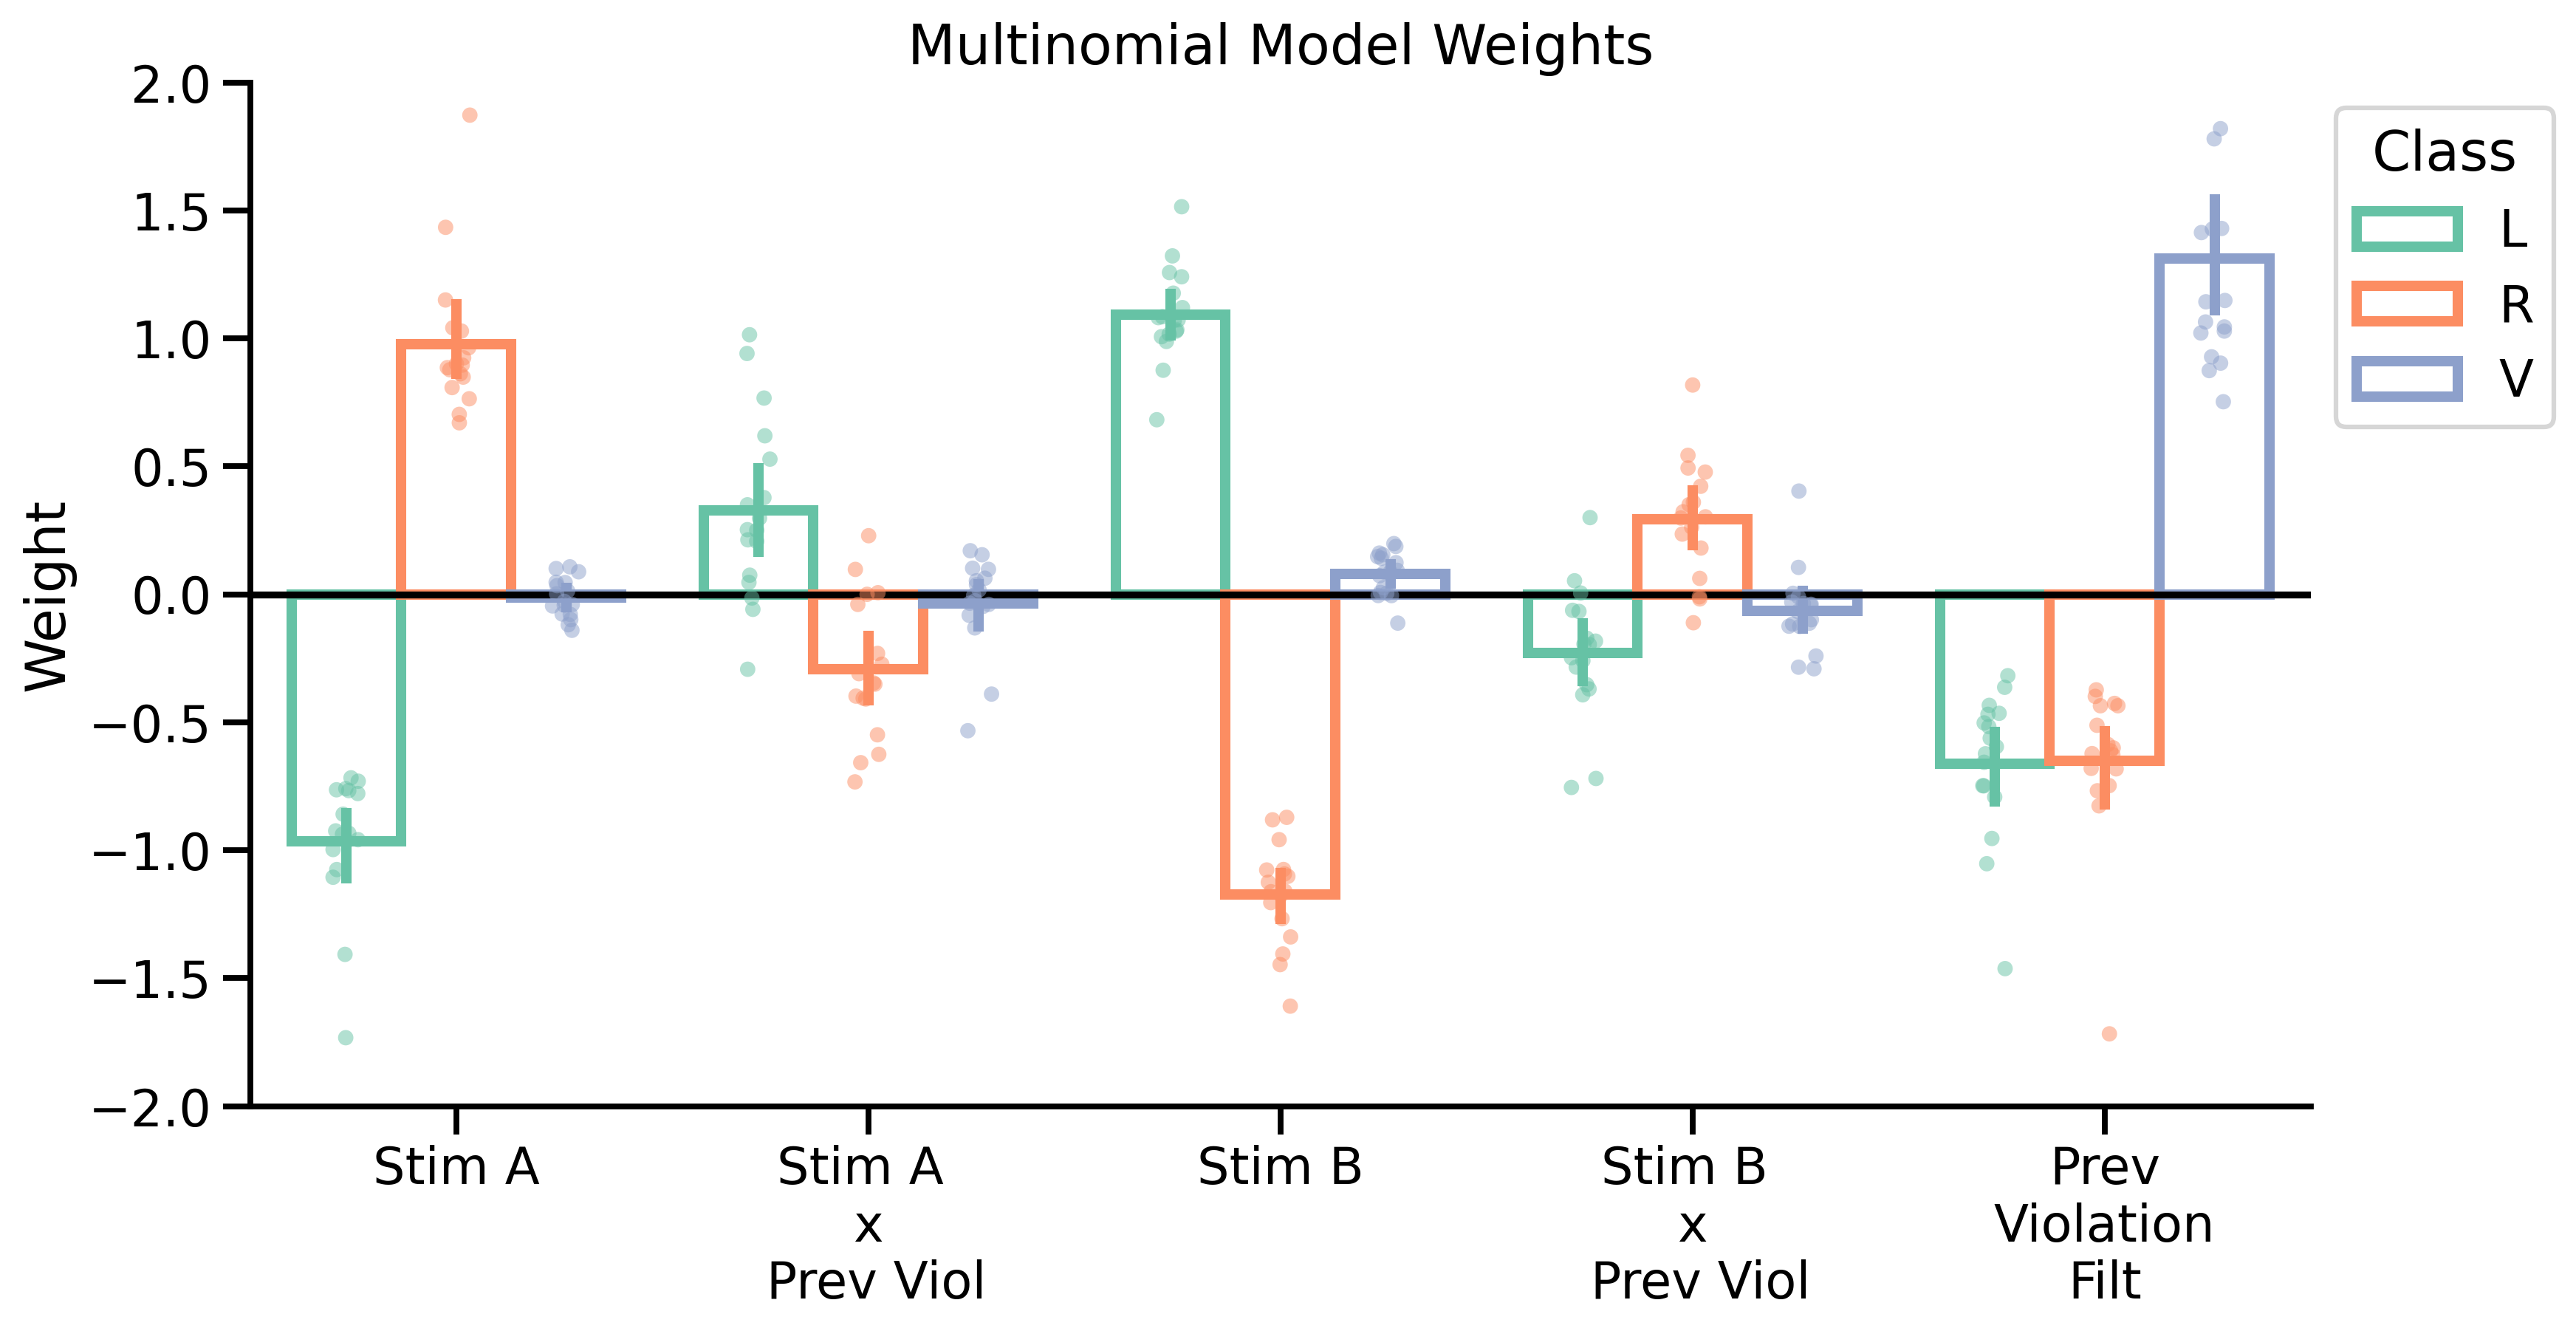

In [123]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)
mv2.plot_weights_summary(
    plot_individuals=True,
    palette="Set2",
    order=order,
    ax=ax,
)

ax.legend(bbox_to_anchor=(1, 1), title="Class")
_ = ax.set(title=title, ylabel=ylabel, xlabel="", ylim=ylim)
_ = ax.set_xticklabels(
    xlabels,
    rotation=0,
    ha="center",
)

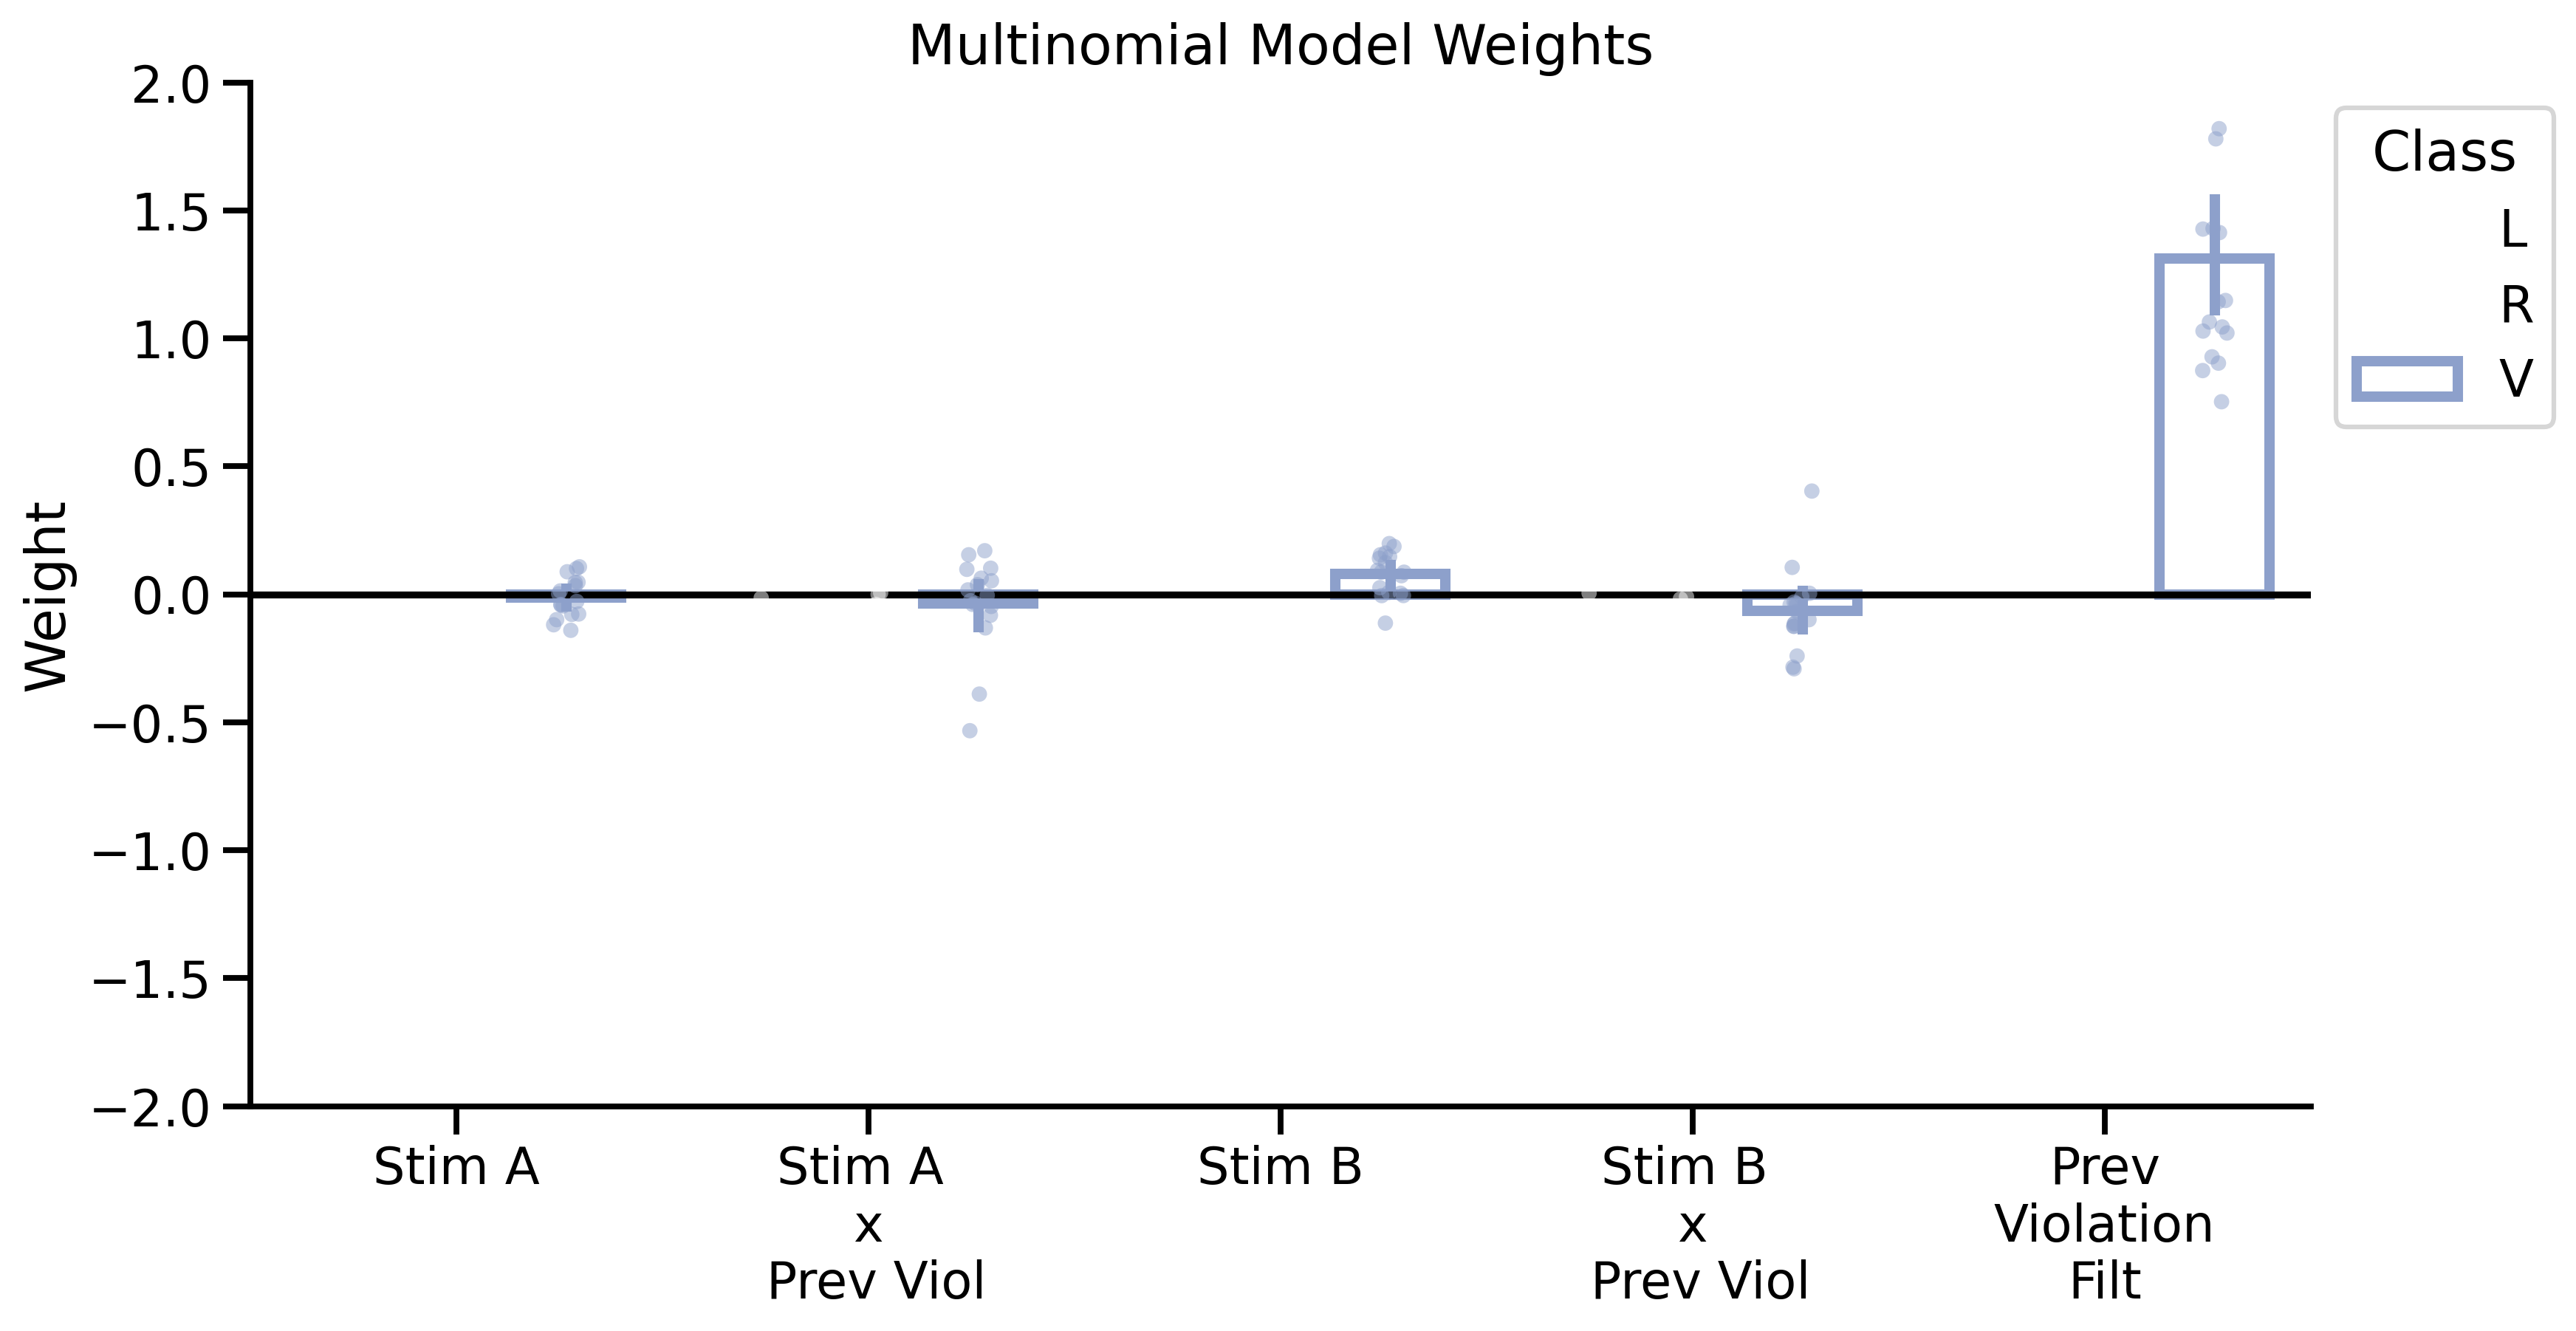

In [124]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

mv2.plot_weights_summary(
    plot_individuals=True,
    palette=violation_only_pal,
    order=order,
    ax=ax,
)

ax.legend(bbox_to_anchor=(1, 1), title="Class")
_ = ax.set(title=title, ylabel=ylabel, xlabel="", ylim=ylim)
_ = ax.set_xticklabels(
    xlabels,
    rotation=0,
    ha="center",
)

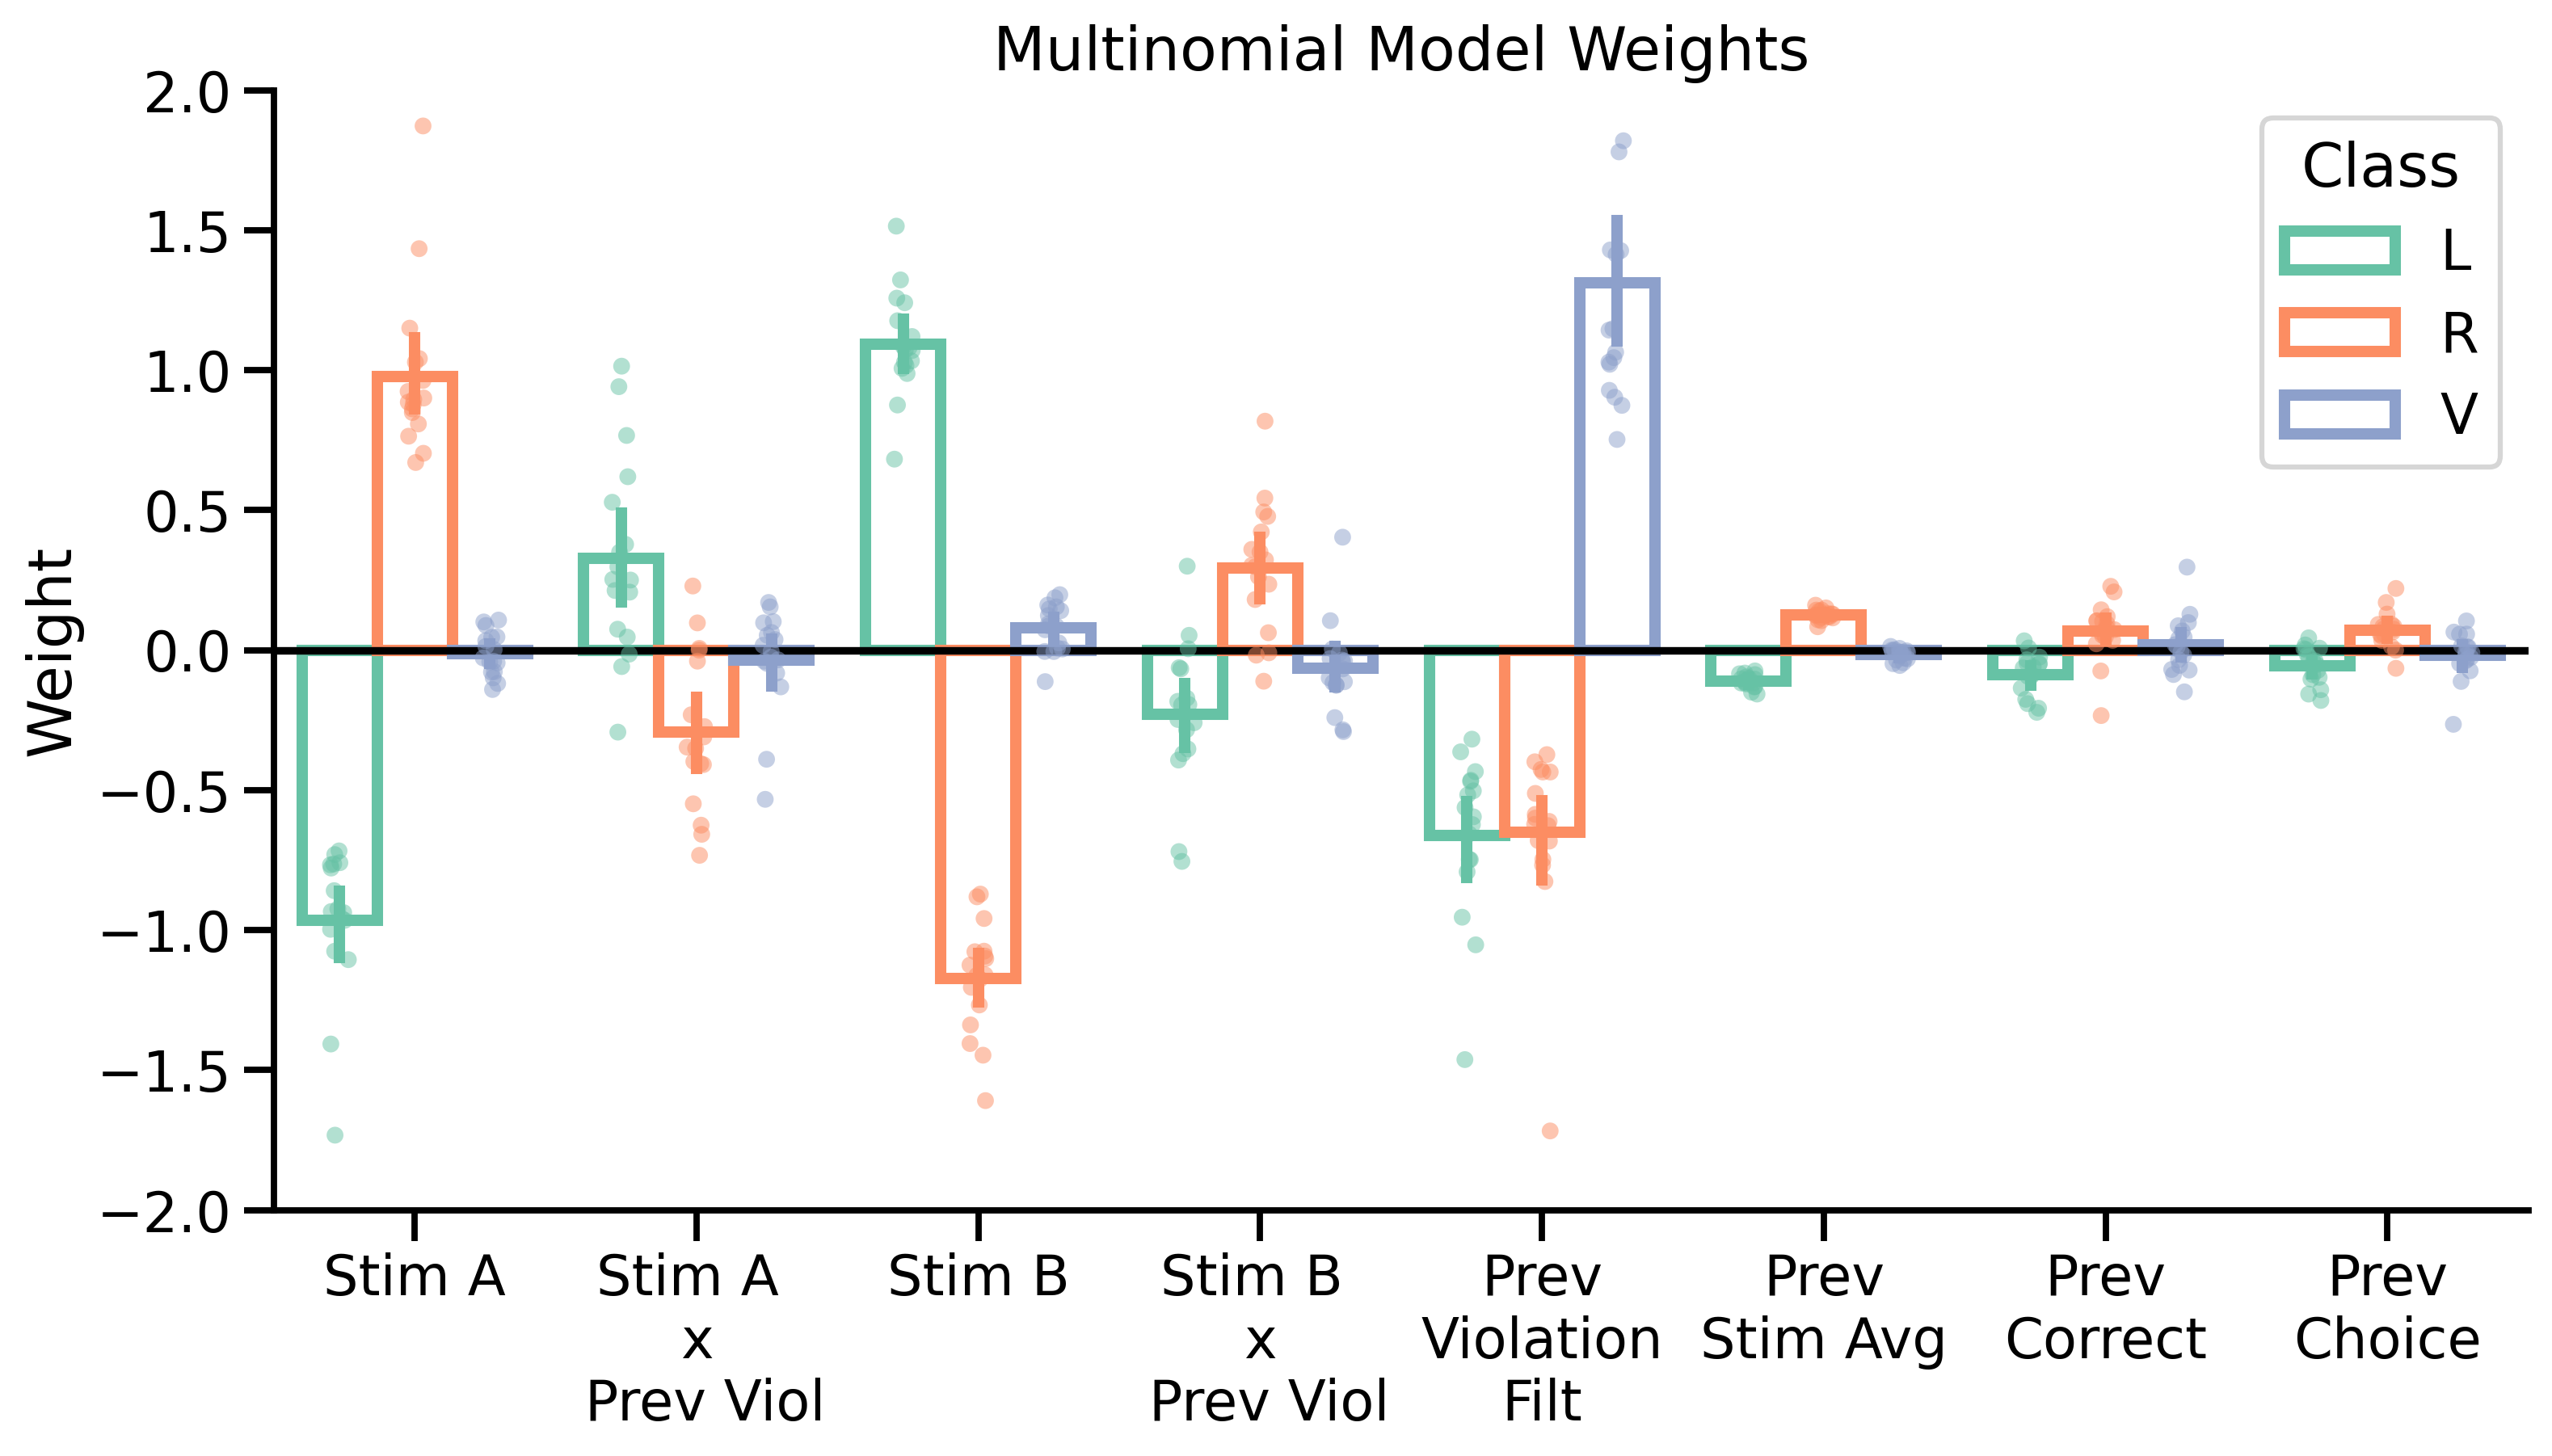

In [132]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

order = [
    "s_a",
    "s_a_x_prev_viol",
    "s_b",
    "s_b_x_prev_viol",
    "prev_violation_filt",
    "prev_stim_avg",
    "prev_correct",
    "prev_choice",
]
xlabels = [
    "Stim A",
    "Stim A \nx\n Prev Viol",
    "Stim B",
    "Stim B \nx\n Prev Viol",
    "Prev\nViolation\nFilt",
    "Prev\nStim Avg",
    "Prev\nCorrect",
    "Prev\nChoice",
]
mv2.plot_weights_summary(
    plot_individuals=True,
    palette="Set2",
    order=order,
    ax=ax,
)

ax.legend(bbox_to_anchor=(1, 1), title="Class")
_ = ax.set(title=title, ylabel=ylabel, xlabel="", ylim=ylim)
_ = ax.set_xticklabels(
    xlabels,
    rotation=0,
    ha="center",
)